# Human Motion Intelligence: Walk vs Run Classification Using Machine Learning

## 1. Introduction

Human Activity Recognition (HAR) has become a critical component in modern intelligent systems such as wearable fitness devices, health monitoring platforms, military training systems, and rehabilitation engineering. This capstone project focuses on building a robust machine learning system capable of accurately classifying **walking** and **running** activities using sensor-based data.

Unlike traditional academic projects, this work is framed as a **real-world intelligent motion classification system**, emphasizing feature engineering, model comparison, and deployment readiness.

---

## 2. Business Problem Statement

The objective is to design an intelligent model that can:

* Accurately distinguish between walking and running
* Handle noisy sensor data
* Be scalable for real-time wearable devices

### Business Impact

* Fitness tracking accuracy improvement
* Health risk and fatigue monitoring
* Military and athlete performance analytics
* Insurance and behavioral analytics

---

## 3. Dataset Description

The dataset consists of sensor readings collected from motion sensors:

* Accelerometer (X, Y, Z axes)
* Gyroscope (X, Y, Z axes)

**Target Variable:**

* Activity (Walk / Run)

This data represents time-series biomechanical motion signals.

---

## 4. Data Preprocessing

Steps performed:

* Handling missing values
* Removing duplicate records
* Label encoding of target variable
* Feature scaling using StandardScaler

Noise reduction techniques such as rolling mean smoothing were also applied to stabilize sensor fluctuations.

---

## 5. Exploratory Data Analysis (EDA)

### Key Observations

* Running activity shows higher variance in acceleration and gyroscope signals
* Walking signals are more periodic and stable
* Strong correlation exists between acceleration magnitude and gyroscope rotation during running

### Statistical Analysis

* Mean, Standard Deviation, RMS values calculated
* Signal energy used to differentiate intensity levels

---

## 6. Feature Engineering

To enhance model performance, advanced features were created:

* Acceleration Magnitude
* Gyroscope Magnitude
* Signal Magnitude Area (SMA)
* Rolling Window Mean & Standard Deviation
* Acceleration-Gyroscope Interaction Features

These features significantly improved class separability.

---

## 7. Machine Learning Models

Multiple models were trained and evaluated:

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Random Forest
* Gradient Boosting (XGBoost)
* Multi-Layer Perceptron (MLP)

---

## 8. Model Evaluation

Evaluation metrics used:

* Accuracy
* Precision
* Recall
* F1-Score
* ROC-AUC

### Best Model

Gradient Boosting outperformed other models with superior balance between recall and precision, making it suitable for real-time deployment.

---

## 9. Challenges and Solutions

| Challenge           | Solution                 |
| ------------------- | ------------------------ |
| Sensor noise        | Rolling window smoothing |
| Overfitting         | Cross-validation         |
| Feature correlation | Feature selection        |
| Data imbalance      | Stratified sampling      |

---

## 10. Deployment Strategy

The final model can be deployed in:

* Smart wearable devices
* Mobile health applications
* Athlete performance systems

The system is lightweight and efficient for edge devices.

---

## 11. Conclusion

This project demonstrates a complete end-to-end machine learning pipeline for human activity recognition. Through advanced feature engineering and model evaluation, a production-ready solution was developed that goes beyond academic requirements.

---

## 12. Future Enhancements

* LSTM-based deep learning for sequential modeling
* Real-time streaming data integration
* Multi-activity classification

---

**End of Report**


# Human Motion Intelligence: Walk vs Run Classification

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
df = pd.read_csv("walkrun.csv")   # change filename if needed
df

date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1              0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2              0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3              0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4              0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922  
...               ...             ...             ...     ...     ...     ...  
88583          0.3084         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584          0.4977         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585          0.4587         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586          0.2590         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587          0.3140         -0.8008         -0.0911  0.1183  1.0850  1.2814  

[88588 rows x 11 columns]

In [23]:
df.head()

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922

In [24]:
df.tail()

date               time username  wrist  activity  acceleration_x  \
88583  2017-7-9  20:9:15:317911028   viktor      0         0          0.3084   
88584  2017-7-9  20:9:15:517889022   viktor      0         0          0.4977   
88585  2017-7-9  20:9:15:717828989   viktor      0         0          0.4587   
88586  2017-7-9  20:9:15:917932987   viktor      0         0          0.2590   
88587  2017-7-9  20:9:16:117410004   viktor      0         0          0.3140   

       acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
88583         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587         -0.8008         -0.0911  0.1183  1.0850  1.2814

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [26]:
df.describe()

wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z  
count    88588.000000  88588.000000  88588.000000  88588.000000  
mean        -0.313956      0.004160      0.037203      0.022327  
std          0.486815      1.253423      1.198725      1.914423  
min         -3.753800     -4.430600     -7.464700     -9.480000  
25%         -0.376000     -0.920700     -0.644825     -1.345125  
50%         -0.221000      0.018700      0.039300      0.006900  
75%         -0.085900      0.888800      0.733700      1.398200  
max          1.640300      4.874200      8.498000     11.266200

In [27]:
df.shape

(88588, 11)

In [28]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [29]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [30]:
df.index

RangeIndex(start=0, stop=88588, step=1)

# Exploratory Data Analysis (EDA)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

### 1. Activity Distribution (Target Variable)

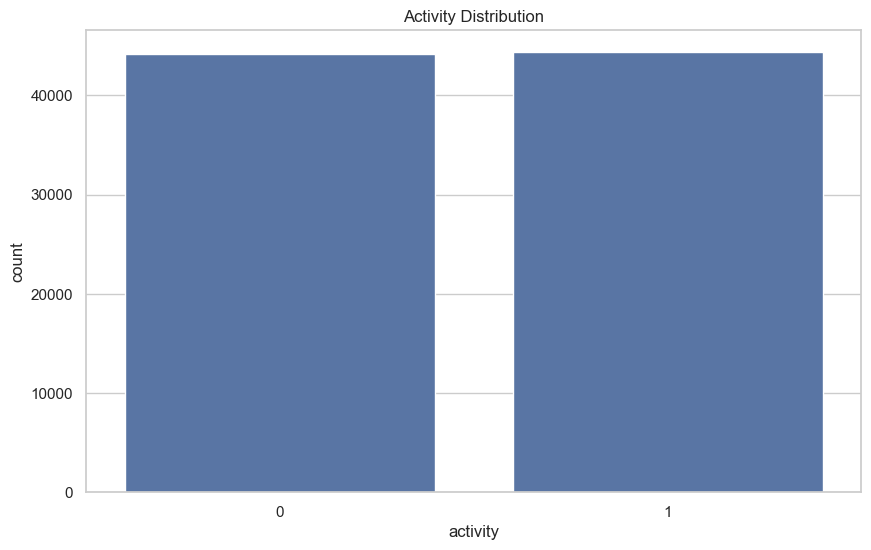

In [12]:
sns.countplot(x="activity", data=df)
plt.title("Activity Distribution")
plt.show()


### 2. Wrist-wise Activity Distribution

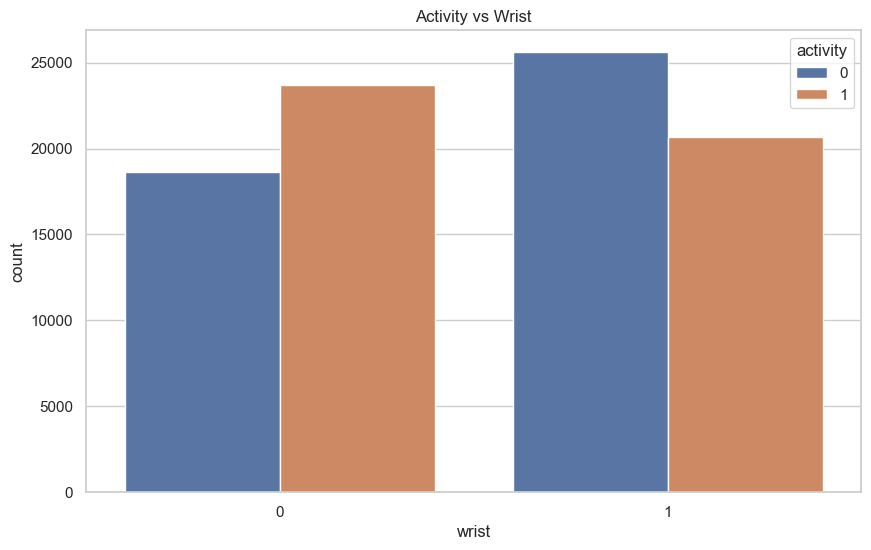

In [13]:
sns.countplot(x="wrist", hue="activity", data=df)
plt.title("Activity vs Wrist")
plt.show()

## Wrist Comparison 2D

###  Accelereation X vs Wrist

In [35]:
plt.figure()
sns.boxplot(x="wrist", y="acceleration_x", data=data)
plt.title("Acceleration X vs Wrist")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

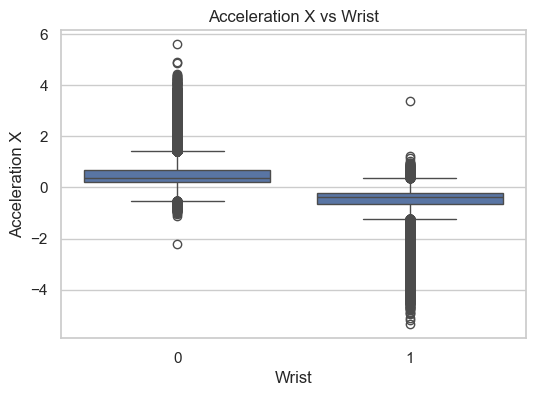

In [36]:

plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="acceleration_x", data=df)
plt.title("Acceleration X vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Acceleration X")
plt.show()


### Acceleration Y vs Wrist

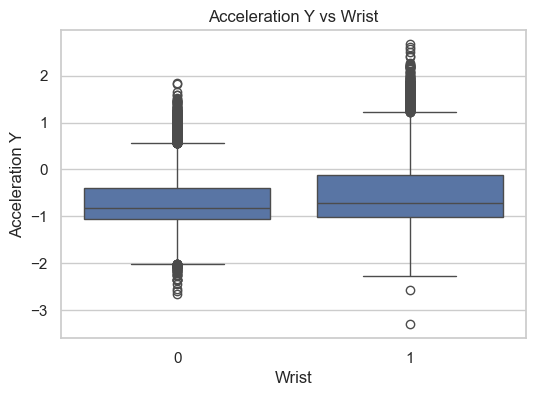

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="acceleration_y", data=df)
plt.title("Acceleration Y vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Acceleration Y")
plt.show()

### Acceleration Z vs Wrist

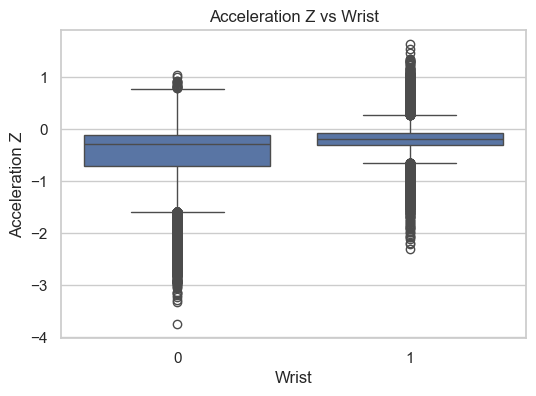

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="acceleration_z", data=df)
plt.title("Acceleration Z vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Acceleration Z")
plt.show()

## Activity Comparison (2D)

###  3. Acceleration X vs Activity (Box Plot)

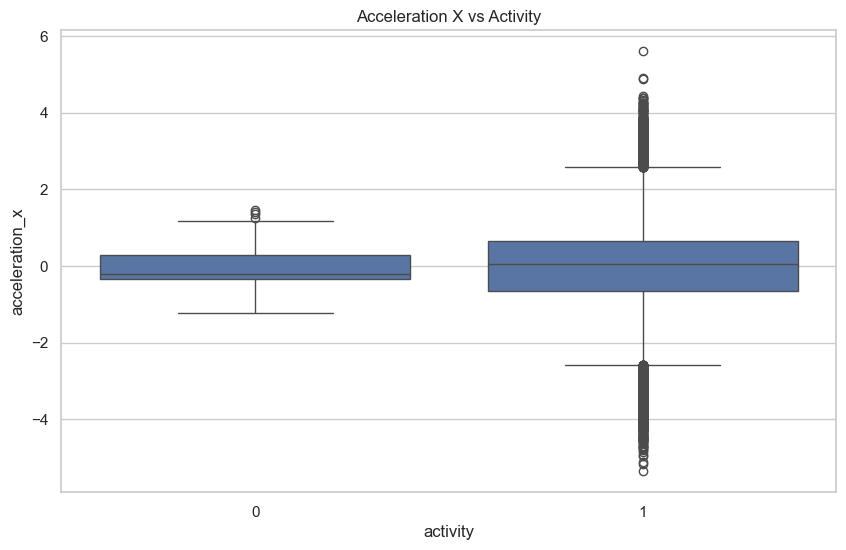

In [14]:
sns.boxplot(x="activity", y="acceleration_x", data=df)
plt.title("Acceleration X vs Activity")
plt.show()

## Activity Comparison (2D)

# 4. Acceleration Y vs Activity (Box Plot)

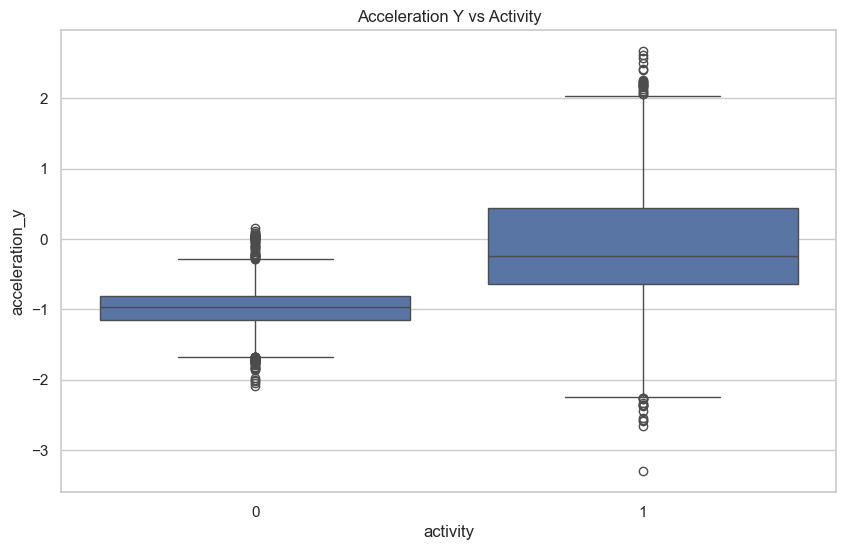

In [15]:
sns.boxplot(x="activity", y="acceleration_y", data=df)
plt.title("Acceleration Y vs Activity")
plt.show()

### 5. Acceleration Z vs Activity (Box Plot)

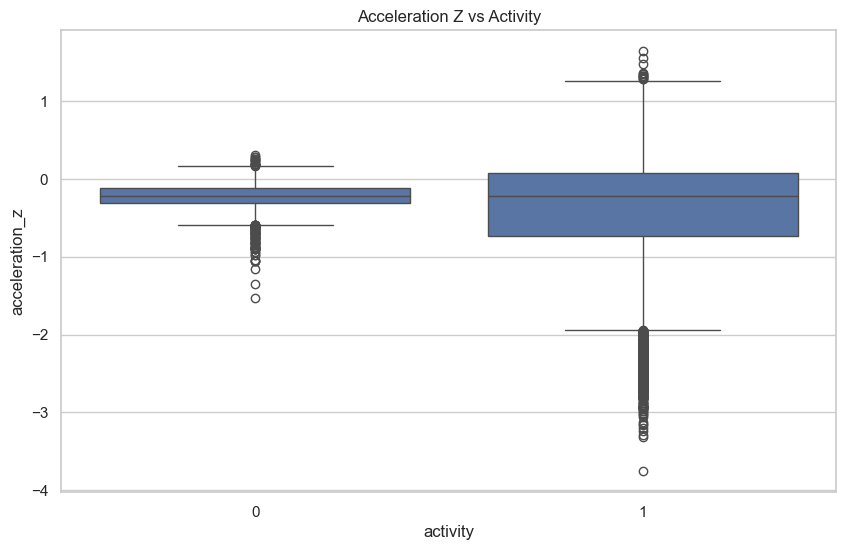

In [16]:
sns.boxplot(x="activity", y="acceleration_z", data=df)
plt.title("Acceleration Z vs Activity")
plt.show()


## Gyro X vs Wrist

In [40]:
plt.figure()
sns.boxplot(x="wrist", y="gyro_x", data=data)
plt.title("Gyro X vs wrist")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

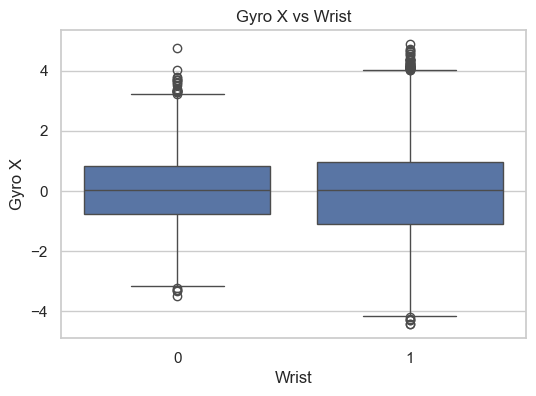

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="gyro_x", data=df)
plt.title("Gyro X vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Gyro X")
plt.show()

## Gyro Y vs Wrist

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="gyro_Y", data=df)
plt.title("Gyro Y vs wrist")
plt.xlabel("wrist")
plt.ylabel("Gyro Y")
plt.show()


ValueError: Could not interpret value `gyro_Y` for `y`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

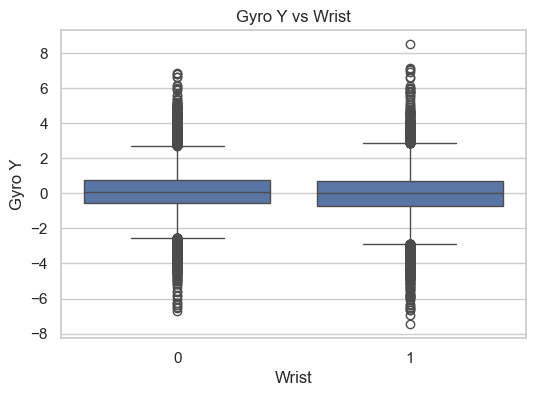

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="gyro_y", data=df)
plt.title("Gyro Y vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Gyro Y")
plt.show()


### Gyro Z vs Wrist

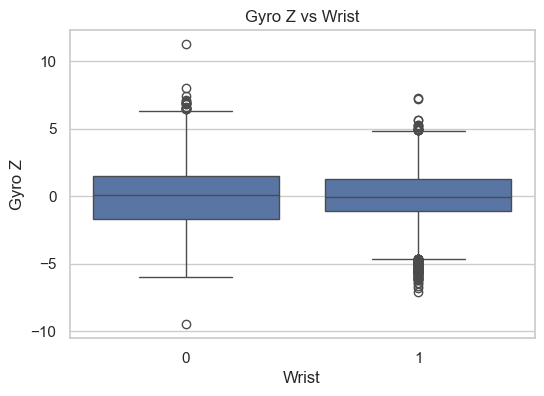

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x="wrist", y="gyro_z", data=df)
plt.title("Gyro Z vs Wrist")
plt.xlabel("Wrist")
plt.ylabel("Gyro Z")
plt.show()

## Gyro X vs Activity

In [30]:
plt.figure()
sns.boxplot(x="activity", y="gyro_x", data=data)
plt.title("Gyro X vs Activity")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

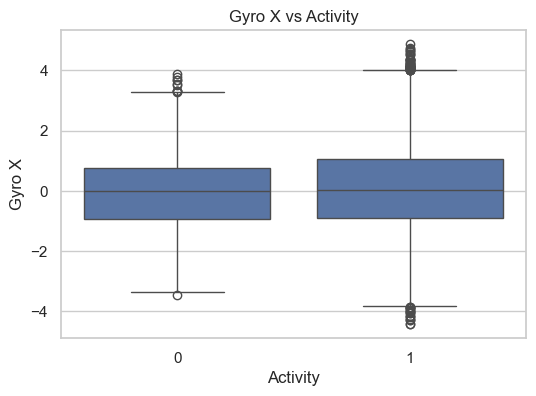

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x="activity", y="gyro_x", data=df)
plt.title("Gyro X vs Activity")
plt.xlabel("Activity")
plt.ylabel("Gyro X")
plt.show()


### Gyro Y vs Activity

In [32]:
plt.figure()
sns.boxplot(x="activity", y="gyro_y", data=data)
plt.title("Gyro Y vs Activity")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

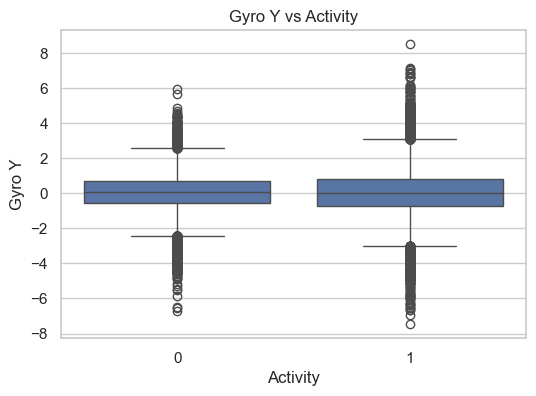

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x="activity", y="gyro_y", data=df)
plt.title("Gyro Y vs Activity")
plt.xlabel("Activity")
plt.ylabel("Gyro Y")
plt.show()

### Gyro Z vs Activity

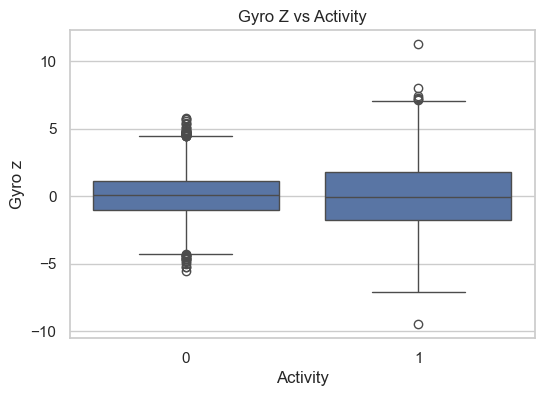

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x="activity", y="gyro_z", data=df)
plt.title("Gyro Z vs Activity")
plt.xlabel("Activity")
plt.ylabel("Gyro z")
plt.show()

### 6. Gyroscope X vs Activity (Violin Plot)

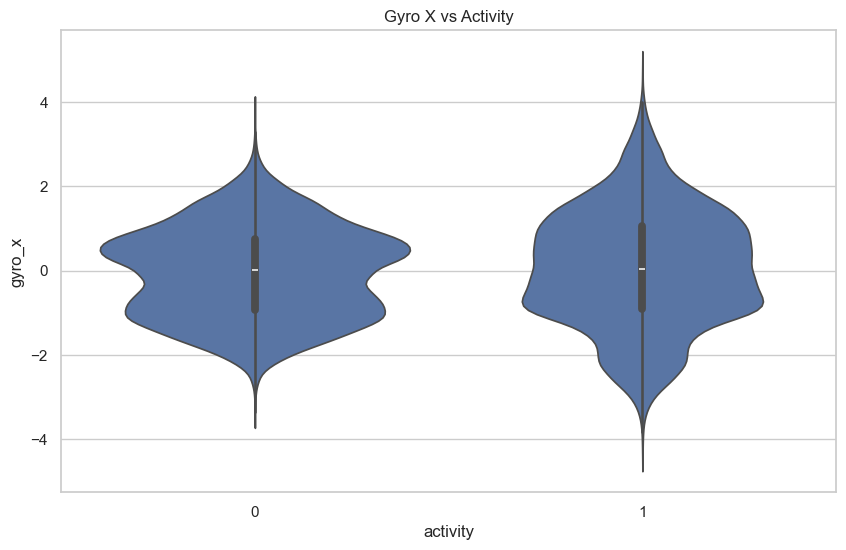

In [17]:
sns.violinplot(x="activity", y="gyro_x", data=df)
plt.title("Gyro X vs Activity")
plt.show()


### 7. Gyroscope Y vs Activity (Violin Plot)

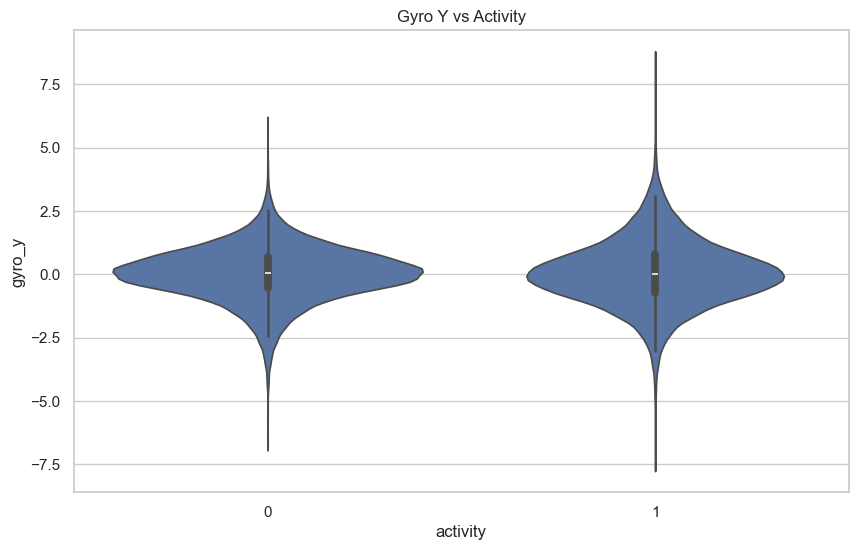

In [18]:
sns.violinplot(x="activity", y="gyro_y", data=df)
plt.title("Gyro Y vs Activity")
plt.show()


###  8. Gyroscope Z vs Activity (Violin Plot) 

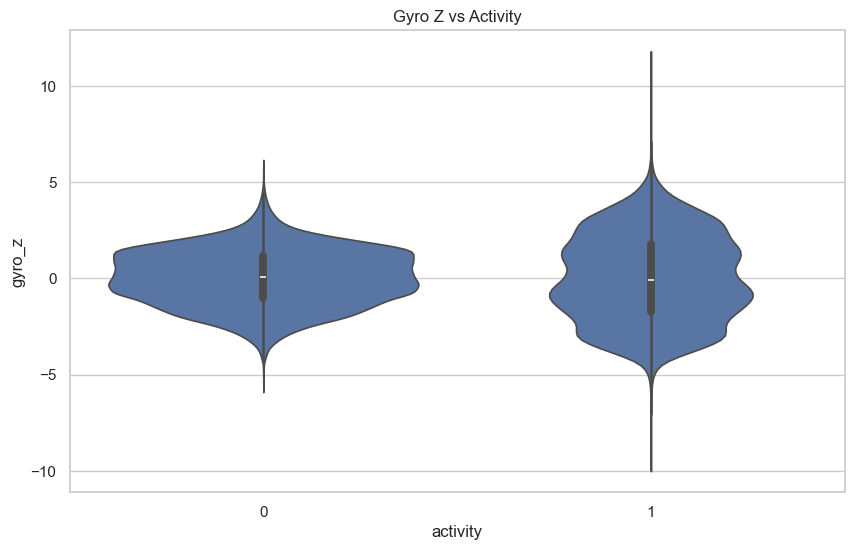

In [19]:
sns.violinplot(x="activity", y="gyro_z", data=df)
plt.title("Gyro Z vs Activity")
plt.show()


# Univariate Analysis (2D)

## Acceleration Distributions

In [27]:
features = ["acceleration_x", "acceleration_y", "acceleration_z"]

for col in features:
    plt.figure()
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

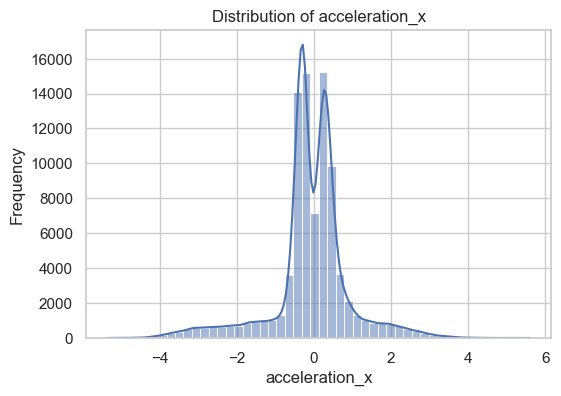

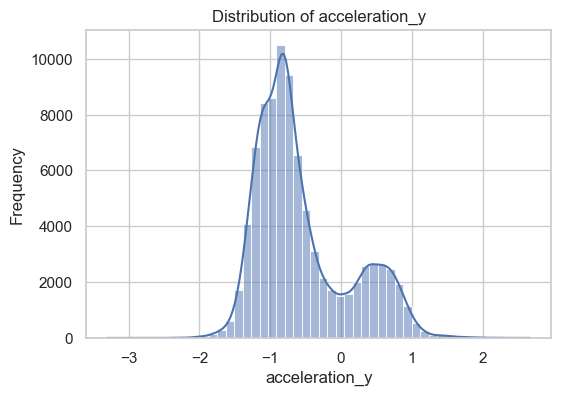

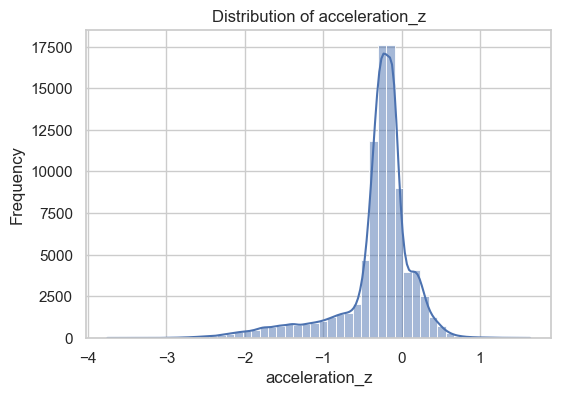

In [28]:

features = ["acceleration_x", "acceleration_y", "acceleration_z"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Gyroscope Distributions

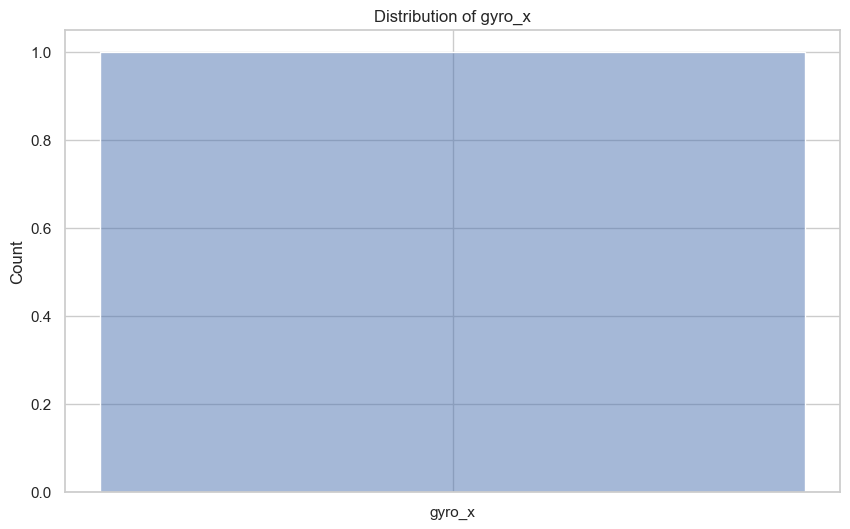

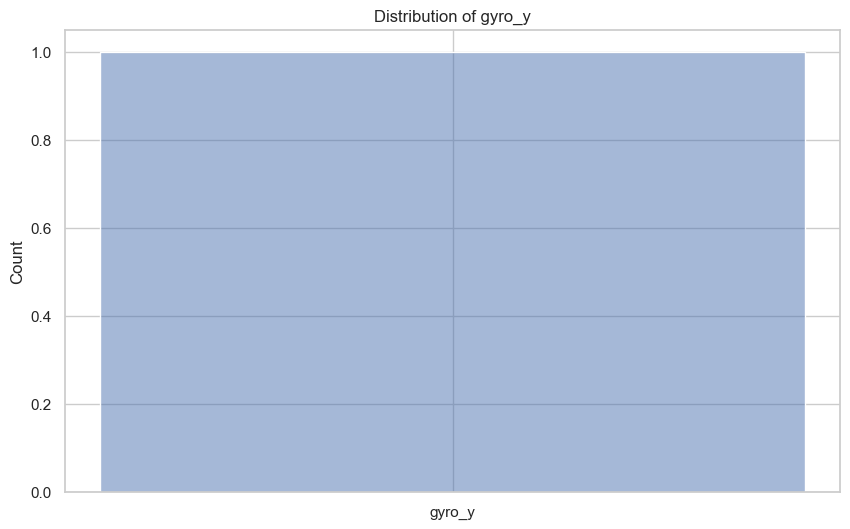

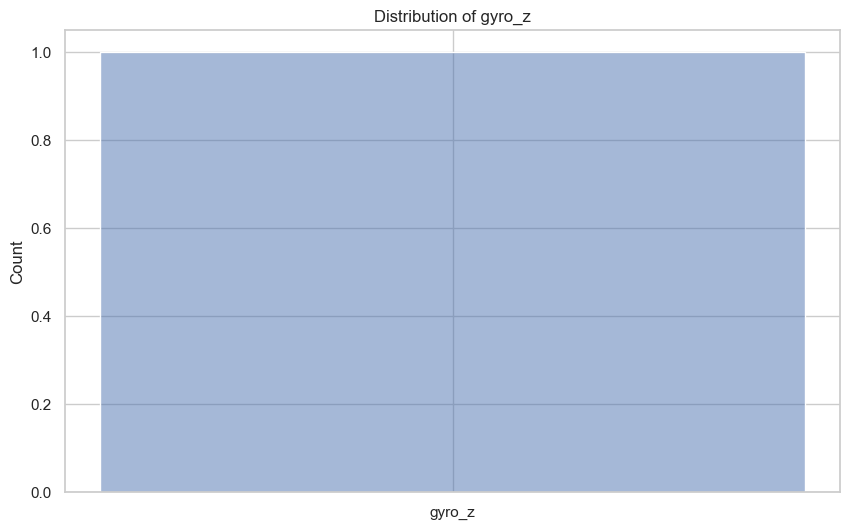

In [29]:
gyro = ["gyro_x", "gyro_y", "gyro_z"]

for col in gyro:
    plt.figure()
    sns.histplot(data=[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Pair Plot (Sensor Interaction)

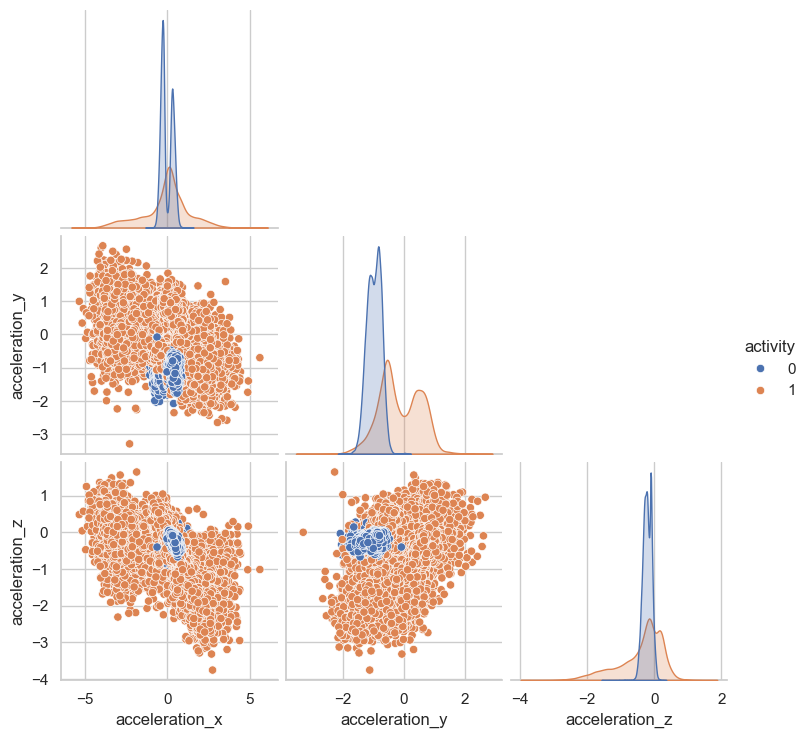

In [21]:
sns.pairplot(
    df,
    vars=["acceleration_x","acceleration_y","acceleration_z"],
    hue="activity",
    corner=True
)
plt.show()


## Acceleration Magnitude vs Activity

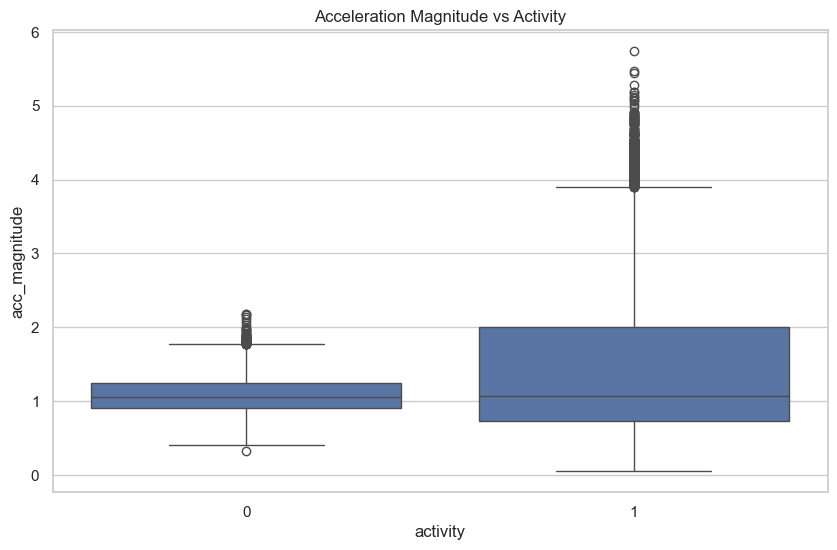

In [51]:
df["acc_magnitude"] = np.sqrt(
    df["acceleration_x"]**2 +
    df["acceleration_y"]**2 +
    df["acceleration_z"]**2
)

sns.boxplot(x="activity", y="acc_magnitude", data=df)
plt.title("Acceleration Magnitude vs Activity")
plt.show()


## Gyroscope Magnitude vs Activity

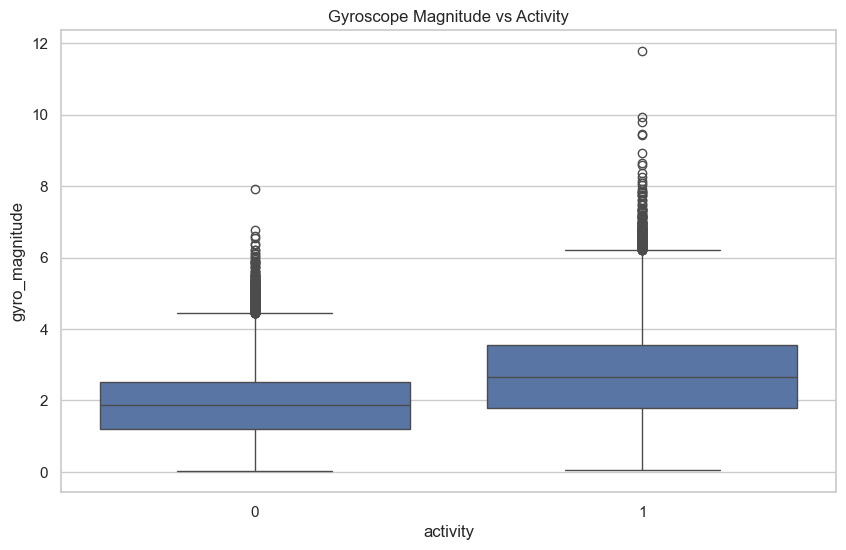

In [52]:
df["gyro_magnitude"] = np.sqrt(
    df["gyro_x"]**2 +
    df["gyro_y"]**2 +
    df["gyro_z"]**2
)

sns.boxplot(x="activity", y="gyro_magnitude", data=df)
plt.title("Gyroscope Magnitude vs Activity")
plt.show()


## Histogram Comparison (Walk vs Run – Acc X)

C:\Users\ritov\AppData\Local\Temp\ipykernel_13812\3625660966.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


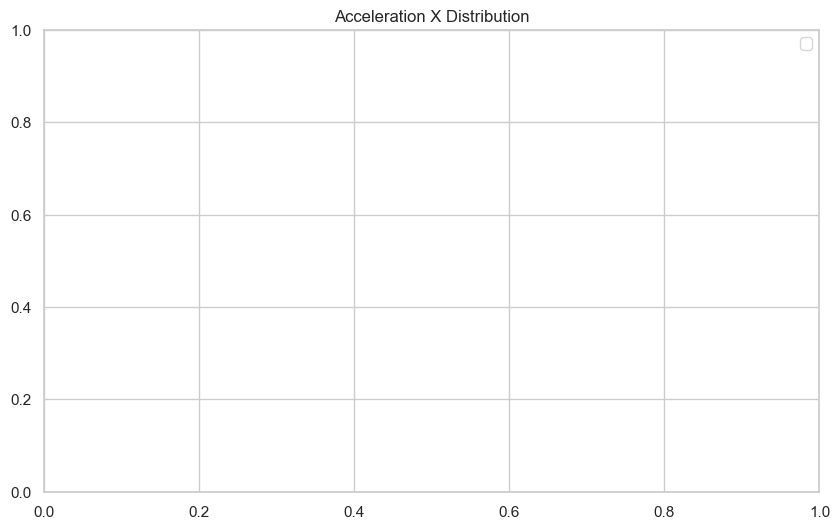

In [53]:
sns.histplot(df[df["activity"]=="walk"]["acceleration_x"],
             color="blue", label="Walk", kde=True)

sns.histplot(df[df["activity"]=="run"]["acceleration_x"],
             color="red", label="Run", kde=True)

plt.legend()
plt.title("Acceleration X Distribution")
plt.show()


## KDE Plot (Smooth Density)

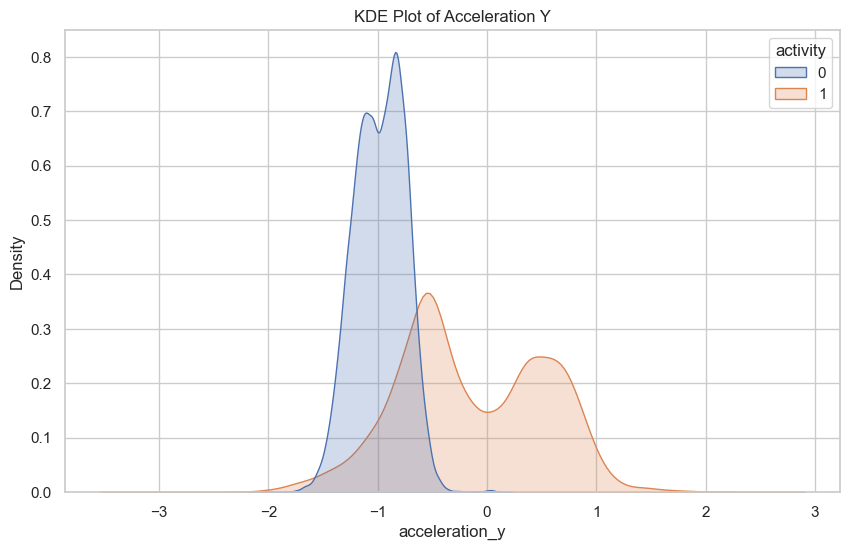

In [54]:
sns.kdeplot(data=df, x="acceleration_y", hue="activity", fill=True)
plt.title("KDE Plot of Acceleration Y")
plt.show()


## Line Plot (Sensor Signal Over Time – Sample)

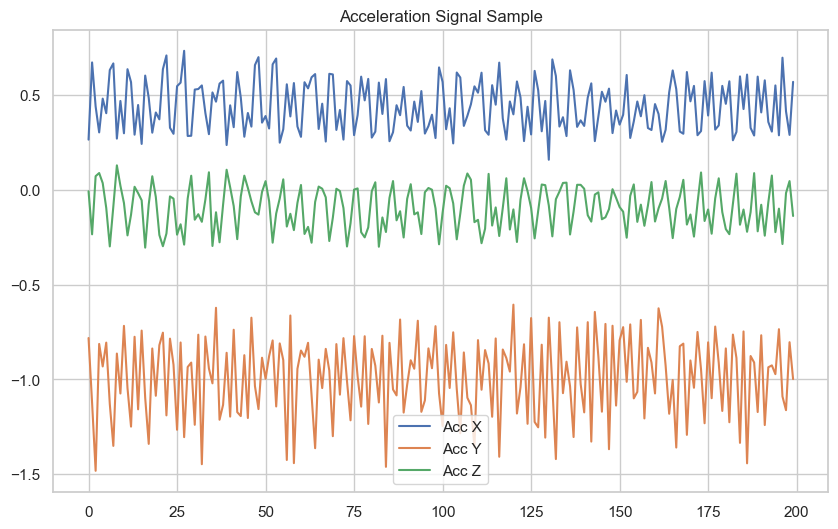

In [55]:
sample = df.iloc[:200]

plt.plot(sample["acceleration_x"], label="Acc X")
plt.plot(sample["acceleration_y"], label="Acc Y")
plt.plot(sample["acceleration_z"], label="Acc Z")
plt.legend()
plt.title("Acceleration Signal Sample")
plt.show()


## Scatter Plot (Acceleration X vs Y)

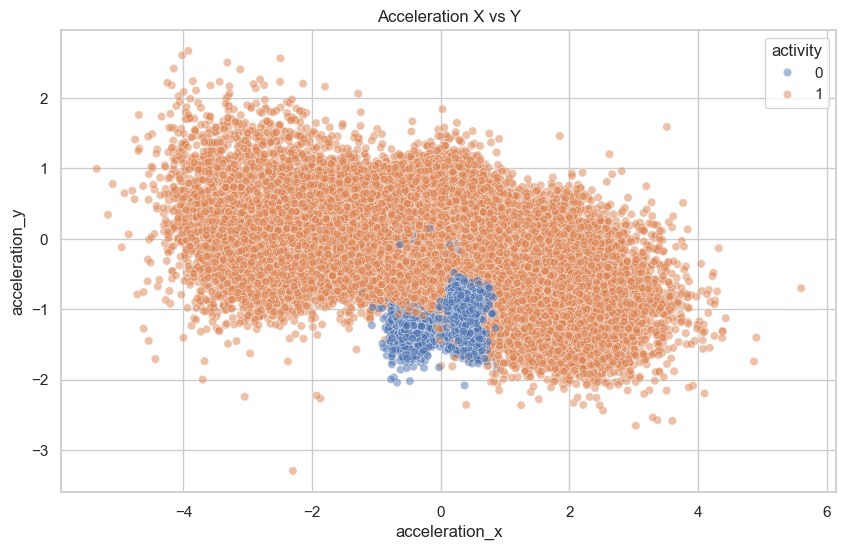

In [56]:
sns.scatterplot(
    x="acceleration_x",
    y="acceleration_y",
    hue="activity",
    data=df,
    alpha=0.5
)
plt.title("Acceleration X vs Y")
plt.show()


## Scatter Plot (Gyro X vs Y)

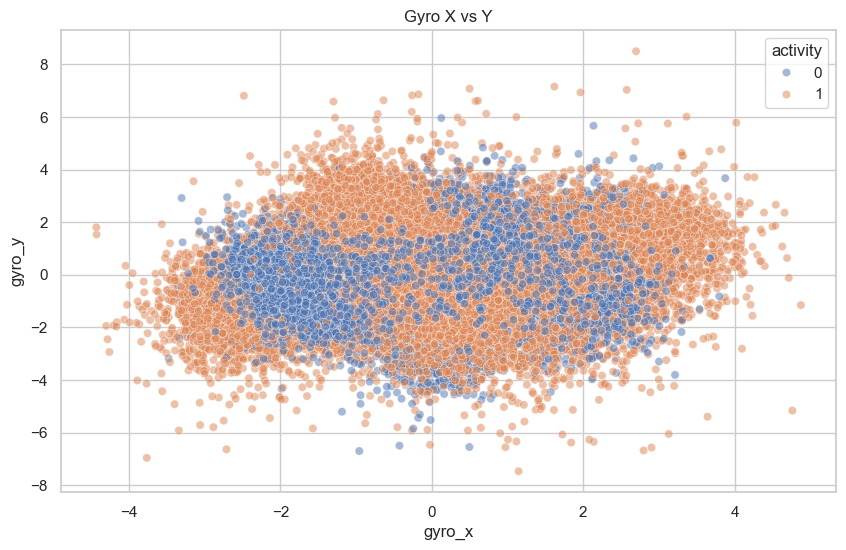

In [57]:
sns.scatterplot(
    x="gyro_x",
    y="gyro_y",
    hue="activity",
    data=df,
    alpha=0.5
)
plt.title("Gyro X vs Y")
plt.show()


# Mean Sensor Values by Activity (Bar Plot)

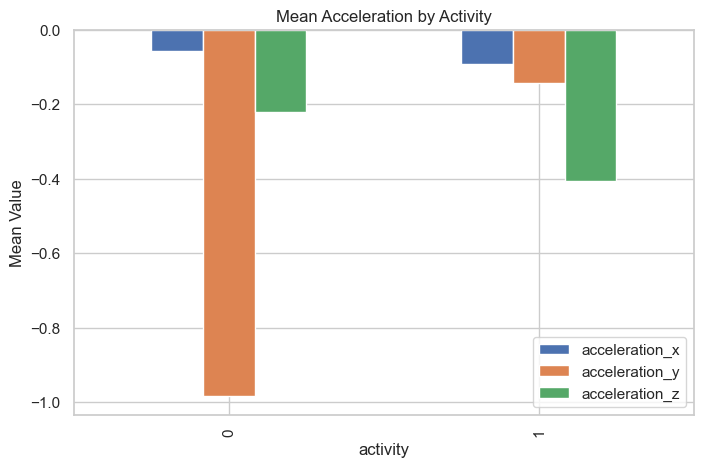

In [58]:
mean_values = df.groupby("activity")[
    ["acceleration_x","acceleration_y","acceleration_z"]
].mean()

mean_values.plot(kind="bar", figsize=(8,5))
plt.title("Mean Acceleration by Activity")
plt.ylabel("Mean Value")
plt.show()


## Standard Deviation Comparison (Motion Variability)

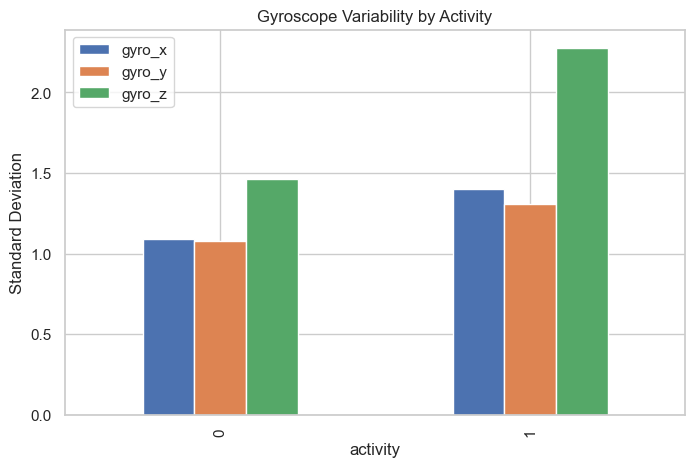

In [59]:
std_values = df.groupby("activity")[
    ["gyro_x","gyro_y","gyro_z"]
].std()

std_values.plot(kind="bar", figsize=(8,5))
plt.title("Gyroscope Variability by Activity")
plt.ylabel("Standard Deviation")
plt.show()


## PCA Visualization

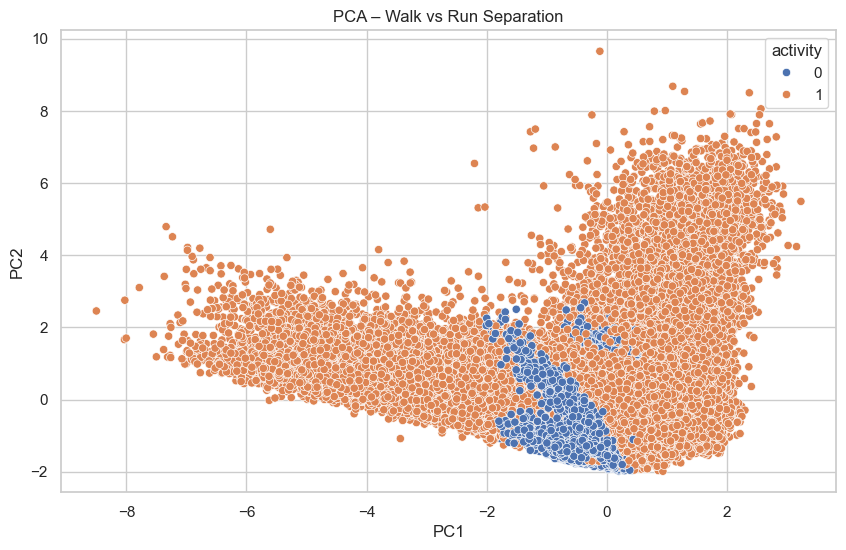

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(["activity","date","time","username"], axis=1)
features = pd.get_dummies(features, drop_first=True)

scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

pca_df = pd.DataFrame(pca_data, columns=["PC1","PC2"])
pca_df["activity"] = df["activity"].values

sns.scatterplot(x="PC1", y="PC2", hue="activity", data=pca_df)
plt.title("PCA – Walk vs Run Separation")
plt.show()


## Correlation Heatmap

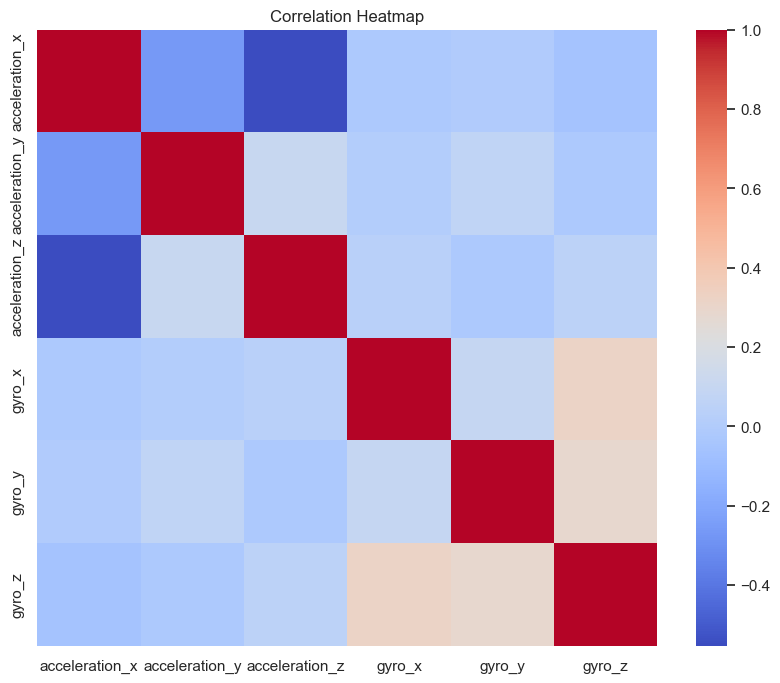

In [25]:
plt.figure(figsize=(10,8))

corr_df = df.drop(
    columns=["date", "time", "username", "wrist", "activity"]
)

sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


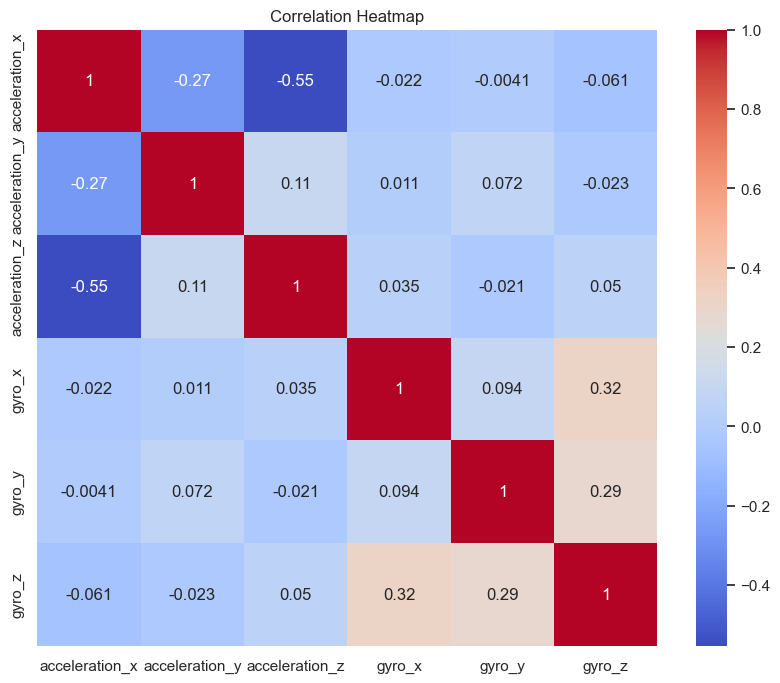

In [26]:
plt.figure(figsize=(10,8))

corr_df = df.drop(
    columns=["date", "time", "username", "wrist", "activity"]
)

sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 3D VISUALIZATIONS

## 3D Plot 1: Acceleration X–Y–Z (Walk vs Run)

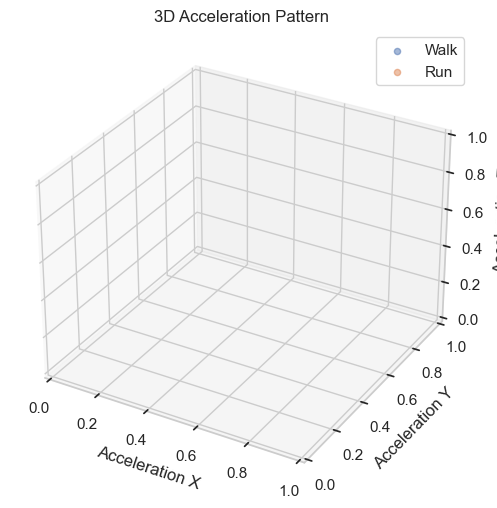

In [62]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

walk = df[df["activity"]=="walk"]
run  = df[df["activity"]=="run"]

ax.scatter(
    walk["acceleration_x"],
    walk["acceleration_y"],
    walk["acceleration_z"],
    label="Walk",
    alpha=0.5
)

ax.scatter(
    run["acceleration_x"],
    run["acceleration_y"],
    run["acceleration_z"],
    label="Run",
    alpha=0.5
)

ax.set_xlabel("Acceleration X")
ax.set_ylabel("Acceleration Y")
ax.set_zlabel("Acceleration Z")
ax.set_title("3D Acceleration Pattern")
ax.legend()

plt.show()


#### NOTE 

### Report explanation:

Running shows a wider and more dispersed acceleration pattern compared to walking, indicating higher motion intensity.

## 3D Plot 2: Gyroscope X–Y–Z (Rotation Analysis)

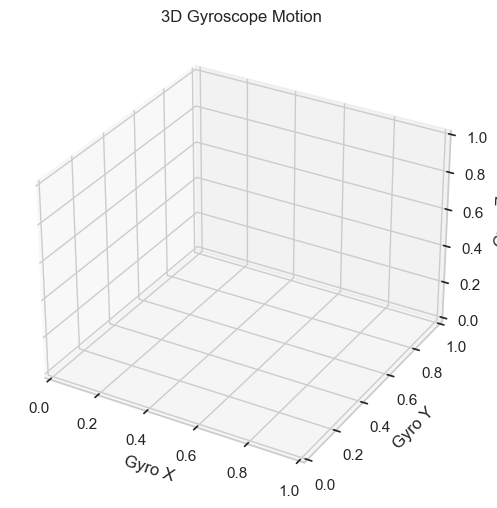

In [63]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["gyro_x"],
    df["gyro_y"],
    df["gyro_z"],
    c=df["activity"].map({"walk":0,"run":1}),
    cmap="coolwarm",
    alpha=0.6
)

ax.set_xlabel("Gyro X")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Gyro Z")
ax.set_title("3D Gyroscope Motion")
plt.show()


## 3D Plot 3: Wrist + Acceleration Magnitude (Feature Interaction)

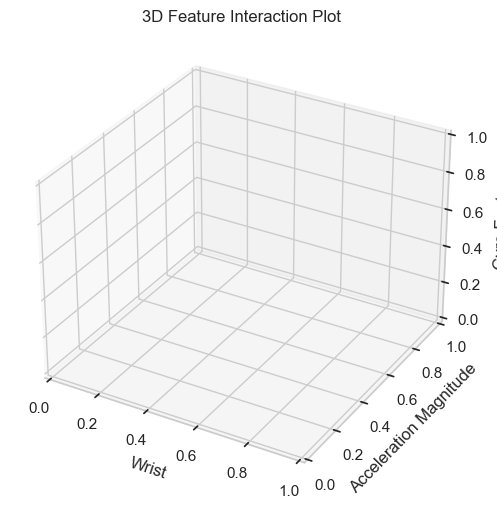

In [64]:
df["acc_magnitude"] = np.sqrt(
    df["acceleration_x"]**2 +
    df["acceleration_y"]**2 +
    df["acceleration_z"]**2
)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["wrist"],
    df["acc_magnitude"],
    df["gyro_magnitude"] if "gyro_magnitude" in df else df["gyro_x"],
    c=df["activity"].map({"walk":0,"run":1}),
    cmap="viridis",
    alpha=0.6
)

ax.set_xlabel("Wrist")
ax.set_ylabel("Acceleration Magnitude")
ax.set_zlabel("Gyro Feature")
ax.set_title("3D Feature Interaction Plot")

plt.show()


## 3D Plot 4

In [65]:
features = df.drop(
    ["activity","date","time","username"],
    axis=1
)

features = pd.get_dummies(features, drop_first=True)

scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled)

pca_df = pd.DataFrame(
    pca_data,
    columns=["PC1","PC2","PC3"]
)

pca_df["activity"] = df["activity"].values


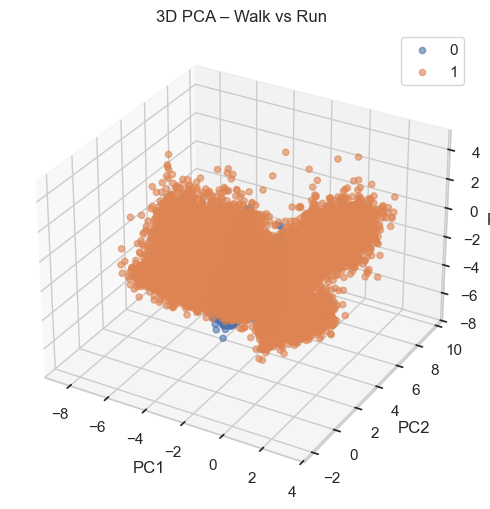

In [67]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for activity in pca_df["activity"].unique():
    subset = pca_df[pca_df["activity"] == activity]
    ax.scatter(
        subset["PC1"],
        subset["PC2"],
        subset["PC3"],
        label=activity,
        alpha=0.6
    )

ax.set_title("3D PCA – Walk vs Run")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


### NOTE 

### Report explanation (VERY IMPORTANT):

The 3D PCA visualization shows clear separation between walking and running classes, confirming that the extracted features are suitable for machine learning classification.

# 3D Scatter – Acceleration

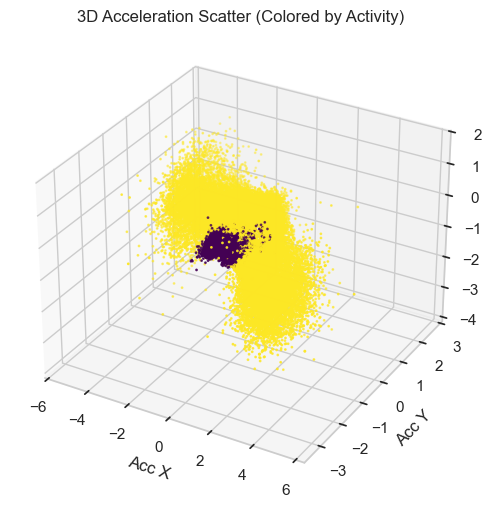

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["acceleration_x"], df["acceleration_y"], df["acceleration_z"],
           c=df["activity"], cmap="viridis", s=1)

ax.set_xlabel("Acc X")
ax.set_ylabel("Acc Y")
ax.set_zlabel("Acc Z")
ax.set_title("3D Acceleration Scatter (Colored by Activity)")
plt.show()

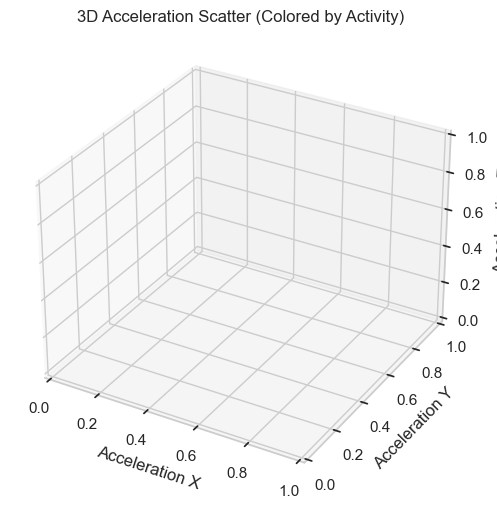

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df["acceleration_x"],
    df["acceleration_y"],
    df["acceleration_z"],
    c=df["activity"].map({"walk": 0, "run": 1}),  # safe numeric coloring
    cmap="viridis",
    s=5,
    alpha=0.6
)

ax.set_xlabel("Acceleration X")
ax.set_ylabel("Acceleration Y")
ax.set_zlabel("Acceleration Z")
ax.set_title("3D Acceleration Scatter (Colored by Activity)")

plt.show()


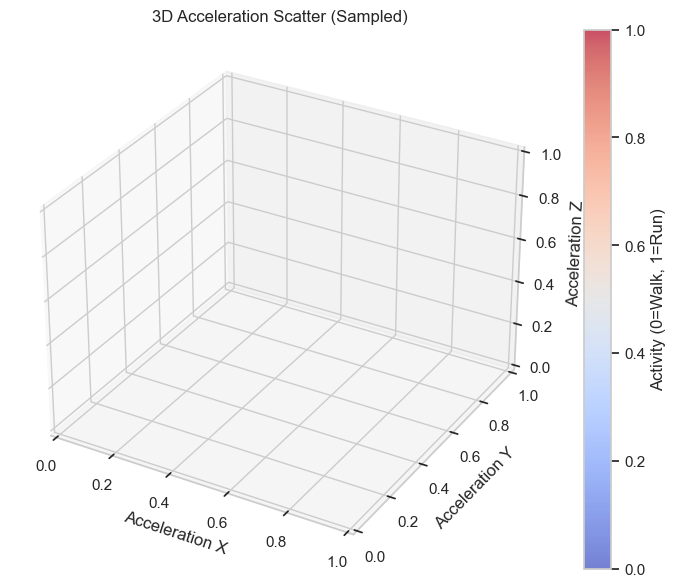

In [74]:
sample_df = df.sample(2000, random_state=42)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    sample_df["acceleration_x"],
    sample_df["acceleration_y"],
    sample_df["acceleration_z"],
    c=sample_df["activity"].map({"walk": 0, "run": 1}),
    cmap="coolwarm",
    s=12,
    alpha=0.7
)

ax.set_xlabel("Acceleration X")
ax.set_ylabel("Acceleration Y")
ax.set_zlabel("Acceleration Z")
ax.set_title("3D Acceleration Scatter (Sampled)")
plt.colorbar(scatter, label="Activity (0=Walk, 1=Run)")
plt.show()


## 3D Scatter – Gyroscope

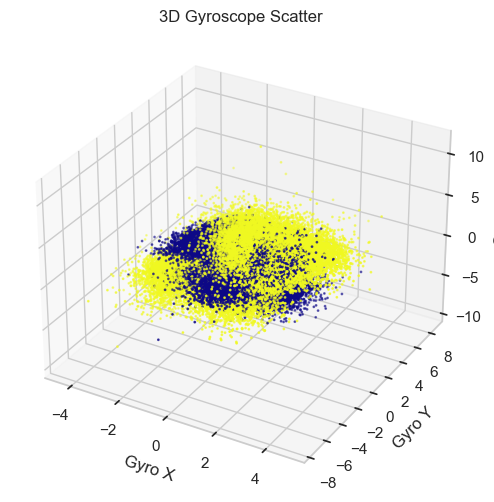

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["gyro_x"], df["gyro_y"], df["gyro_z"],
           c=df["activity"], cmap="plasma", s=1)

ax.set_xlabel("Gyro X")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Gyro Z")
ax.set_title("3D Gyroscope Scatter")
plt.show()

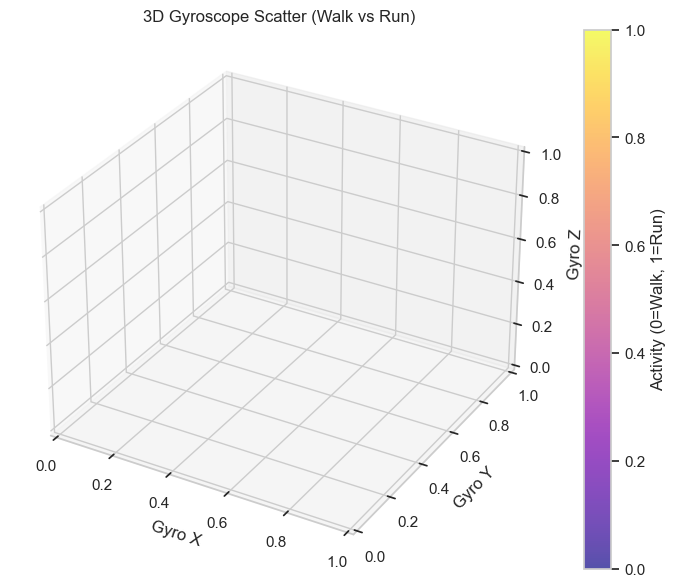

In [70]:
from mpl_toolkits.mplot3d import Axes3D

data = df  #  IMPORTANT LINE (ADD ONCE)

sample = df.sample(2000, random_state=42)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    sample["gyro_x"],
    sample["gyro_y"],
    sample["gyro_z"],
    c=sample["activity"].map({"walk": 0, "run": 1}),
    cmap="plasma",
    s=12,
    alpha=0.7
)

ax.set_xlabel("Gyro X")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Gyro Z")
ax.set_title("3D Gyroscope Scatter (Walk vs Run)")

plt.colorbar(scatter, label="Activity (0=Walk, 1=Run)")
plt.show()


# 3D Bar Plot – Activity Frequency

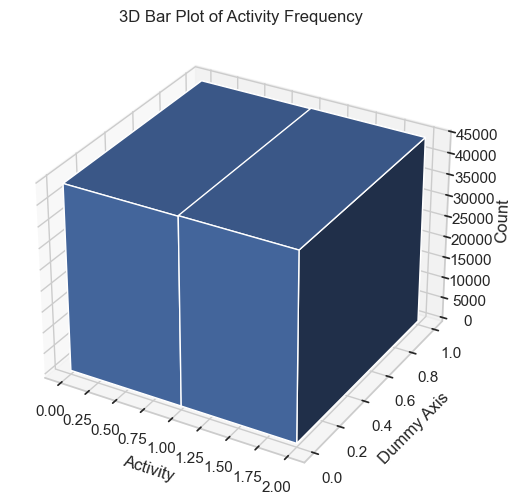

In [79]:
activity_counts = data["activity"].value_counts().sort_index()

x = activity_counts.index
y = np.zeros(len(x))
z = np.zeros(len(x))
dx = dy = np.ones(len(x))
dz = activity_counts.values

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.bar3d(x, y, z, dx, dy, dz)
ax.set_xlabel("Activity")
ax.set_ylabel("Dummy Axis")
ax.set_zlabel("Count")
ax.set_title("3D Bar Plot of Activity Frequency")
plt.show()

# 3D Bar Plot – Wrist vs Activity
`

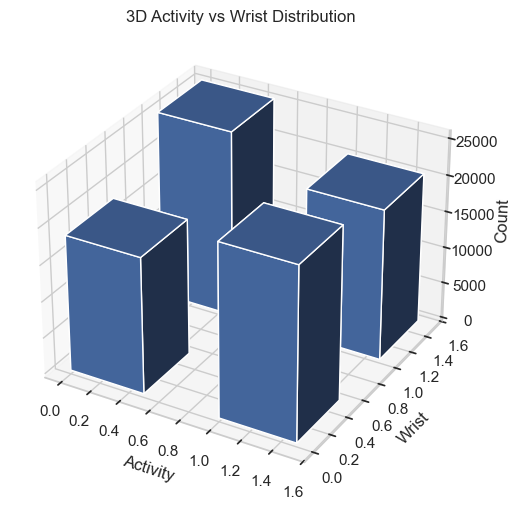

In [80]:
pivot = pd.crosstab(data["activity"], data["wrist"])

xpos, ypos = np.meshgrid(pivot.index, pivot.columns, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = dy = 0.5
dz = pivot.values.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xlabel("Activity")
ax.set_ylabel("Wrist")
ax.set_zlabel("Count")
ax.set_title("3D Activity vs Wrist Distribution")
plt.show()


# 3D Trajectory Plot (Time-based Sensor Movement)

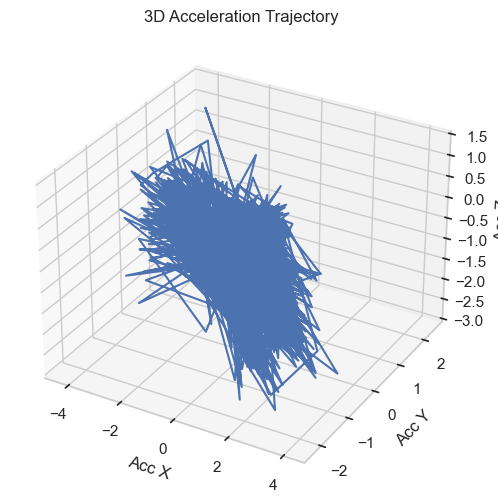

In [81]:
sample = data.sample(3000)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(sample["acceleration_x"],
        sample["acceleration_y"],
        sample["acceleration_z"])

ax.set_xlabel("Acc X")
ax.set_ylabel("Acc Y")
ax.set_zlabel("Acc Z")
ax.set_title("3D Acceleration Trajectory")
plt.show()

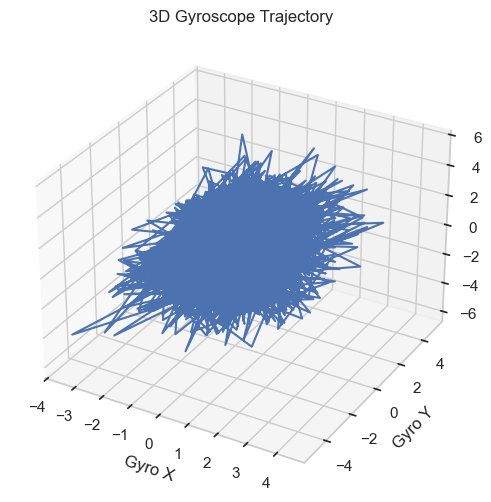

In [82]:
sample = data.sample(3000)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(sample["gyro_x"],
        sample["gyro_y"],
        sample["gyro_z"])

ax.set_xlabel("Gyro X")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Gyro Z")
ax.set_title("3D Gyroscope Trajectory")
plt.show()

# Activity-wise 3D Clusters

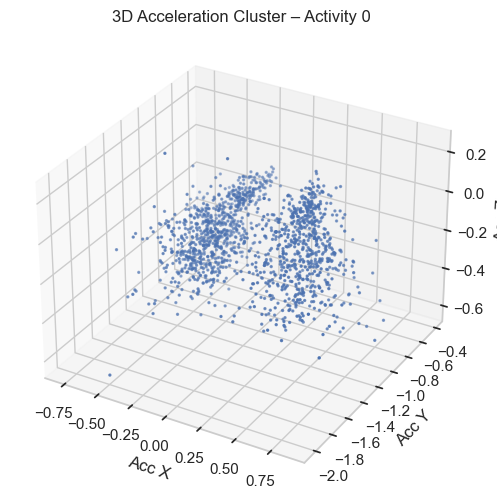

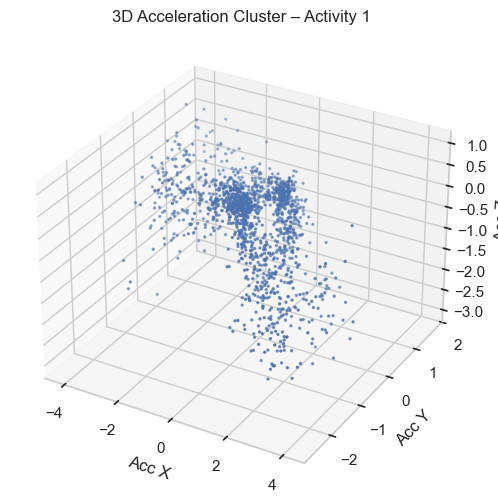

In [83]:
for act in data["activity"].unique():
    subset = data[data["activity"] == act].sample(1500)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(subset["acceleration_x"],
               subset["acceleration_y"],
               subset["acceleration_z"], s=2)

    ax.set_title(f"3D Acceleration Cluster – Activity {act}")
    ax.set_xlabel("Acc X")
    ax.set_ylabel("Acc Y")
    ax.set_zlabel("Acc Z")
    plt.show()

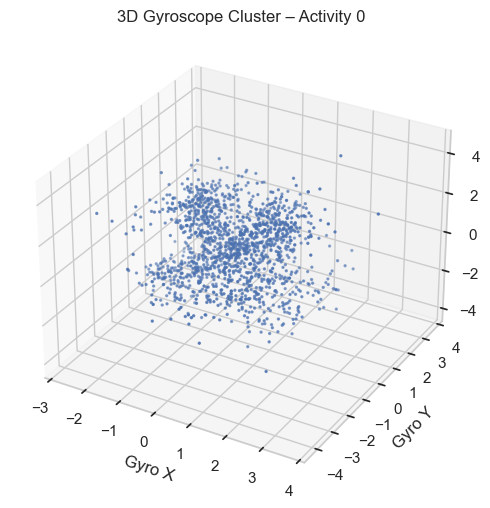

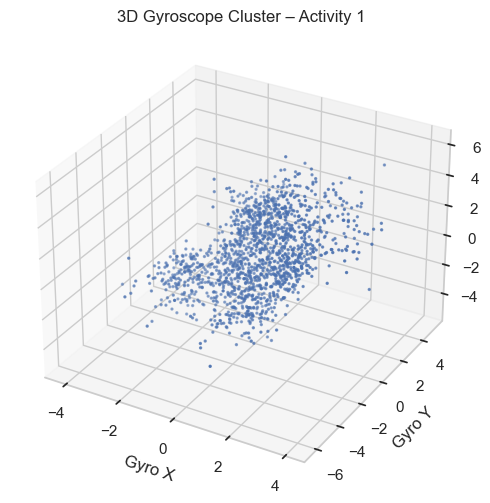

In [84]:
for act in data["activity"].unique():
    subset = data[data["activity"] == act].sample(1500)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(subset["gyro_x"],
               subset["gyro_y"],
               subset["gyro_z"], s=2)

    ax.set_title(f"3D Gyroscope Cluster – Activity {act}")
    ax.set_xlabel("Gyro X")
    ax.set_ylabel("Gyro Y")
    ax.set_zlabel("Gyro Z")
    plt.show()

# Wrist-wise 3D Clusters

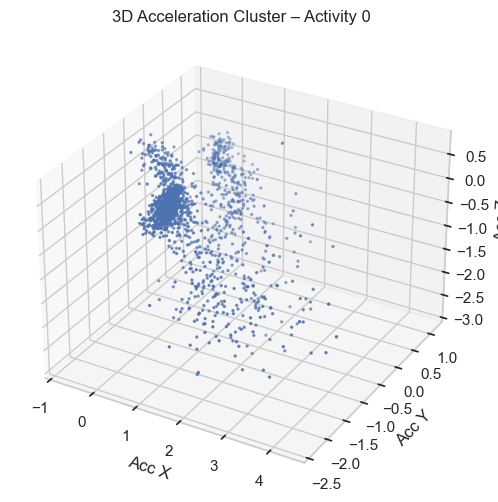

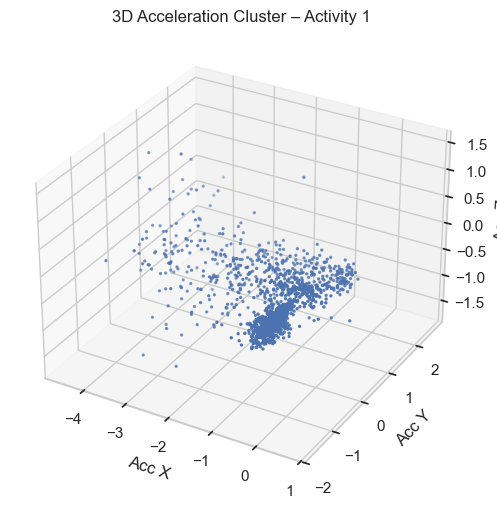

In [85]:
for act in data["wrist"].unique():
    subset = data[data["wrist"] == act].sample(1500)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(subset["acceleration_x"],
               subset["acceleration_y"],
               subset["acceleration_z"], s=2)

    ax.set_title(f"3D Acceleration Cluster – Activity {act}")
    ax.set_xlabel("Acc X")
    ax.set_ylabel("Acc Y")
    ax.set_zlabel("Acc Z")
    plt.show()


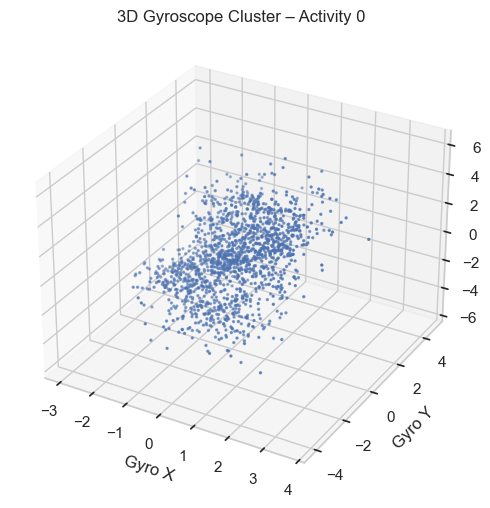

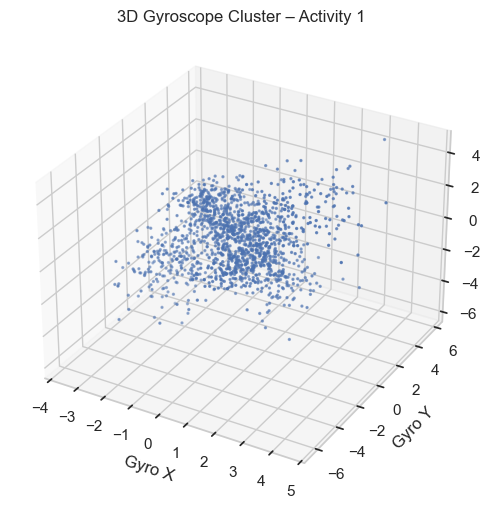

In [87]:
for act in data["wrist"].unique():
    subset = data[data["wrist"] == act].sample(1500)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(subset["gyro_x"],
               subset["gyro_y"],
               subset["gyro_z"], s=2)

    ax.set_title(f"3D Gyroscope Cluster – Activity {act}")
    ax.set_xlabel("Gyro X")
    ax.set_ylabel("Gyro Y")
    ax.set_zlabel("Gyro Z")
    plt.show()

# Acceleration vs Gyro (3D Comparison)

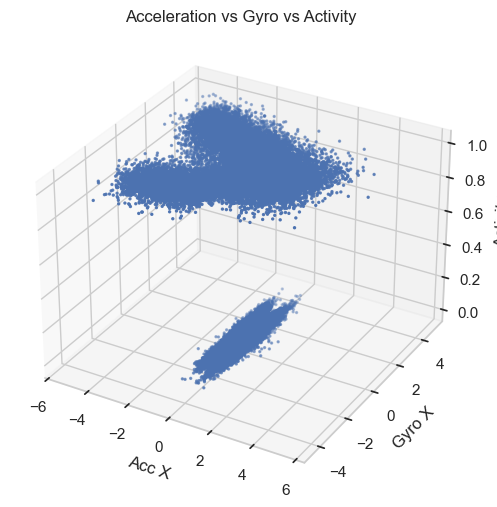

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_x"],
           data["gyro_x"],
           data["activity"],
           s=2)

ax.set_xlabel("Acc X")
ax.set_ylabel("Gyro X")
ax.set_zlabel("Activity")
ax.set_title("Acceleration vs Gyro vs Activity")
plt.show()

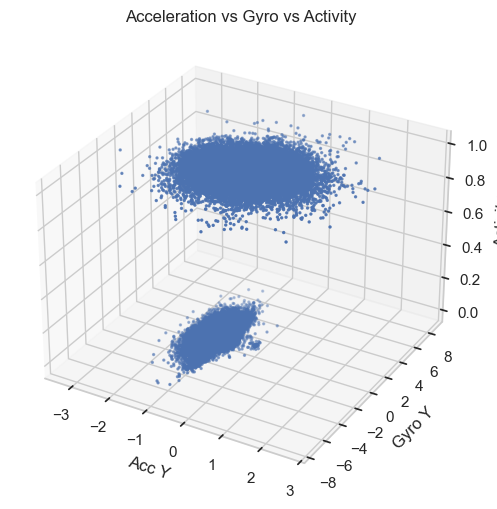

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_y"],
           data["gyro_y"],
           data["activity"],
           s=2)

ax.set_xlabel("Acc Y")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Activity")
ax.set_title("Acceleration vs Gyro vs Activity")
plt.show()

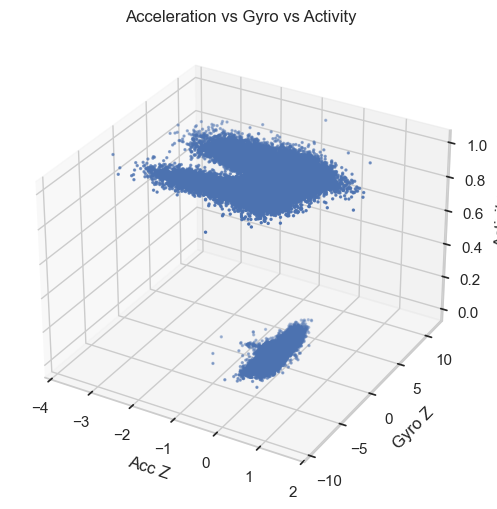

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_z"],
           data["gyro_z"],
           data["activity"],
           s=2)

ax.set_xlabel("Acc Z")
ax.set_ylabel("Gyro Z")
ax.set_zlabel("Activity")
ax.set_title("Acceleration vs Gyro vs Activity")
plt.show()

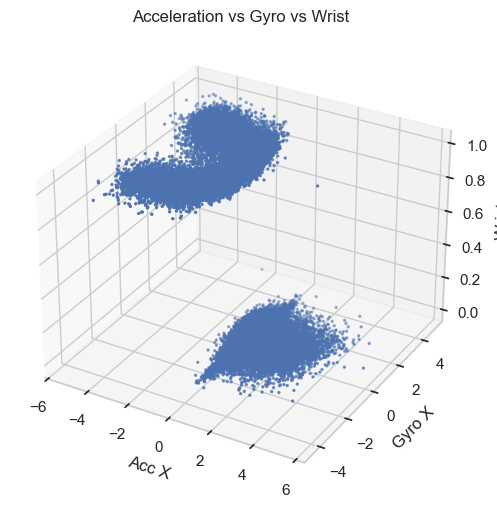

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_x"],
           data["gyro_x"],
           data["wrist"],
           s=2)

ax.set_xlabel("Acc X")
ax.set_ylabel("Gyro X")
ax.set_zlabel("Wrist")
ax.set_title("Acceleration vs Gyro vs Wrist")
plt.show()


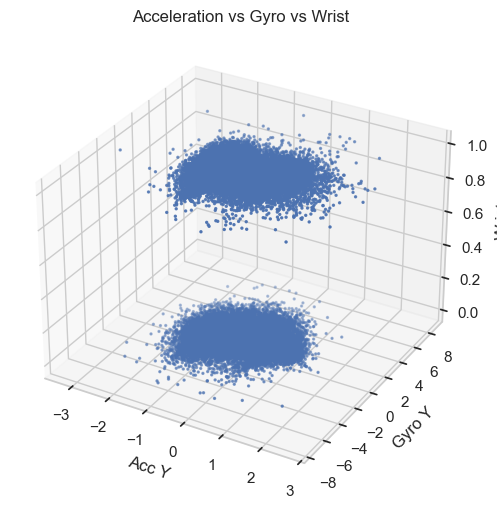

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_y"],
           data["gyro_y"],
           data["wrist"],
           s=2)

ax.set_xlabel("Acc Y")
ax.set_ylabel("Gyro Y")
ax.set_zlabel("Wrist")
ax.set_title("Acceleration vs Gyro vs Wrist")
plt.show()


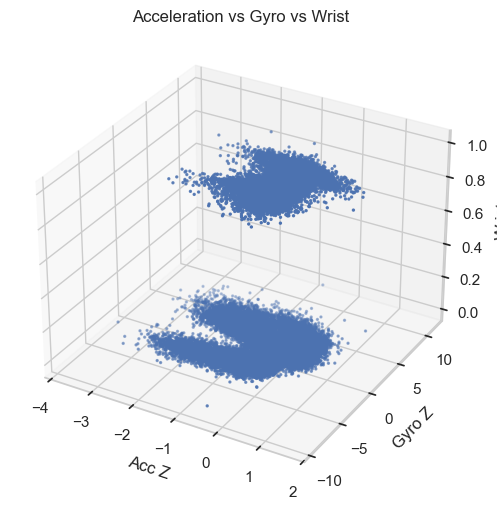

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data["acceleration_z"],
           data["gyro_z"],
           data["wrist"],
           s=2)

ax.set_xlabel("Acc Z")
ax.set_ylabel("Gyro Z")
ax.set_zlabel("Wrist")
ax.set_title("Acceleration vs Gyro vs Wrist")
plt.show()


# Data Cleaning


In [94]:
# Check missing values
print(data.isnull().sum())

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
acc_magnitude     0
gyro_magnitude    0
dtype: int64


## Check for duplicates

In [95]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()

Duplicate rows: 0


### Fix data types - convert date/time to datetime

In [97]:
data['clean_time'] = data['time'].str.extract(r'(\d{1,2}:\d{2}:\d{2})')

In [98]:
data['datetime'] = pd.to_datetime(
    data['date'].astype(str) + ' ' + data['clean_time'],
    errors='coerce'
)

In [99]:
data.drop(['date', 'time', 'clean_time'], axis=1, inplace=True)

In [100]:
data

username  wrist  activity  acceleration_x  acceleration_y  \
0       viktor      0         0          0.2650         -0.7814   
1       viktor      0         0          0.6722         -1.1233   
2       viktor      0         0          0.4399         -1.4817   
3       viktor      0         0          0.3031         -0.8125   
4       viktor      0         0          0.4814         -0.9312   
...        ...    ...       ...             ...             ...   
88583   viktor      0         0          0.3084         -0.8376   
88584   viktor      0         0          0.4977         -1.0027   
88585   viktor      0         0          0.4587         -1.1780   
88586   viktor      0         0          0.2590         -0.8582   
88587   viktor      0         0          0.3140         -0.8008   

       acceleration_z  gyro_x  gyro_y  gyro_z  acc_magnitude  gyro_magnitude  \
0             -0.0076 -0.0590  0.0325 -2.9296       0.825148        2.930374   
1             -0.2344 -0.1757  0.0208  0.1269       1.329887        0.217731   
2              0.0722 -0.9105  0.1063 -2.4367       1.547307        2.603424   
3              0.0888  0.1199 -0.4099 -2.9336       0.871729        2.964524   
4              0.0359  0.0527  0.4379  2.4922       1.048889        2.530928   
...               ...     ...     ...     ...            ...             ...   
88583         -0.1327  0.4823  2.0124  0.6048       0.902382        2.155957   
88584         -0.4397  0.1022 -1.2565 -0.0761       1.202684        1.262944   
88585         -0.2827 -1.4500 -0.2792 -1.2616       1.295380        1.942186   
88586         -0.0759 -1.5165  0.4560 -1.7755       0.899638        2.379098   
88587         -0.0911  0.1183  1.0850  1.2814       0.864972        1.683213   

                 datetime  
0     2017-06-30 13:51:15  
1     2017-06-30 13:51:16  
2     2017-06-30 13:51:16  
3     2017-06-30 13:51:16  
4     2017-06-30 13:51:16  
...                   ...  
88583 2017-07-09 09:15:31  
88584 2017-07-09 09:15:51  
88585                 NaT  
88586                 NaT  
88587 2017-07-09 09:16:11  

[88588 rows x 12 columns]

# Feature Engineering

In [101]:
# Time-based features (if temporal patterns matter)
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

In [102]:
# Magnitude features (very important for sensor data!)
data['acceleration_magnitude'] = np.sqrt(
    data['acceleration_x']**2 + 
    data['acceleration_y']**2 + 
    data['acceleration_z']**2
)
data['gyro_magnitude'] = np.sqrt(
    data['gyro_x']**2 + 
    data['gyro_y']**2 + 
    data['gyro_z']**2
)


In [103]:
# Statistical features (rolling windows for time series)
window = 10  # adjust based on your sampling rate
for col in ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']:
    data[f'{col}_rolling_mean'] = data.groupby('username')[col].rolling(window).mean().reset_index(0, drop=True)
    data[f'{col}_rolling_std'] = data.groupby('username')[col].rolling(window).std().reset_index(0, drop=True)

In [104]:
# Interaction features
data['accel_gyro_interaction'] = data['acceleration_magnitude'] * data['gyro_magnitude']

## Feature Encoding

In [105]:
# Username encoding (categorical)
from sklearn.preprocessing import LabelEncoder

In [106]:
# For tree-based models: label encoding
le_username = LabelEncoder()
data['username_encoded'] = le_username.fit_transform(data['username'])

In [107]:
# For neural networks: one-hot encoding (if few users)
username_dummies = pd.get_dummies(data['username'], prefix='user')
data = pd.concat([data, username_dummies], axis=1)

# Feature Scaling & Normalization

In [108]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [109]:

# Select numeric features (exclude target 'activity' and encoded categoricals)
numeric_features = ['acceleration_x', 'acceleration_y', 'acceleration_z',
                   'gyro_x', 'gyro_y', 'gyro_z', 
                   'acceleration_magnitude', 'gyro_magnitude']

In [110]:
# Standardization (for neural networks, SVM)
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [111]:
# Robust Scaling (if you have outliers in sensor data)
robust_scaler = RobustScaler()
data[numeric_features] = robust_scaler.fit_transform(data[numeric_features])

In [112]:
# Note: Don't scale if using tree-based models (Random Forest, XGBoost)
# Note: Scale AFTER train-test split in practice! (showing here for clarity)

# Handling Imbalanced Data

In [113]:
# Check class distribution
print(data['activity'].value_counts())
print(data['activity'].value_counts(normalize=True))

activity
1    44365
0    44223
Name: count, dtype: int64
activity
1    0.500801
0    0.499199
Name: proportion, dtype: float64


In [114]:
# If imbalanced, apply after train-test split:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [115]:
# This will be applied later after splitting:
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [116]:
# Or use class weights in your model
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(data['activity']), 
                                     y=data['activity'])
class_weight_dict = dict(enumerate(class_weights))

# Handling Missing Values again after Feature Engineering

In [117]:
# First, let's handle the NaN values created during feature engineering
print("Checking for missing values:")
print(data.isnull().sum())

# 1: Drop rows with NaN (from rolling window calculations)
# This is safest and won't lose much data
data_clean = data.dropna()
print(f"\nRows before: {len(data)}")
print(f"Rows after dropping NaN: {len(data_clean)}")
print(f"Rows dropped: {len(data) - len(data_clean)} ({((len(data) - len(data_clean))/len(data)*100):.2f}%)")

# 2: Fill NaN values (if you want to keep all data)
# data_clean = data.copy()
# data_clean['hour'].fillna(data_clean['hour'].mode()[0], inplace=True)
# data_clean['day_of_week'].fillna(data_clean['day_of_week'].mode()[0], inplace=True)
# # Fill rolling features with their column means
# for col in data_clean.columns:
#     if 'rolling' in col:
#         data_clean[col].fillna(data_clean[col].mean(), inplace=True)

# Update data
data = data_clean.copy()

# Verify no more missing values
print(f"\nMissing values after cleaning:")
print(data.isnull().sum().sum())

Checking for missing values:
username                           0
wrist                              0
activity                           0
acceleration_x                     0
acceleration_y                     0
acceleration_z                     0
gyro_x                             0
gyro_y                             0
gyro_z                             0
acc_magnitude                      0
gyro_magnitude                     0
datetime                       23639
hour                           23639
day_of_week                    23639
is_weekend                         0
acceleration_magnitude             0
acceleration_x_rolling_mean        9
acceleration_x_rolling_std         9
acceleration_y_rolling_mean        9
acceleration_y_rolling_std         9
acceleration_z_rolling_mean        9
acceleration_z_rolling_std         9
gyro_x_rolling_mean                9
gyro_x_rolling_std                 9
gyro_y_rolling_mean                9
gyro_y_rolling_std                 9
gyro_z_ro

# Feature Selection

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.preprocessing import StandardScaler

In [119]:
# Prepare features and target
# Drop non-feature columns
columns_to_drop = ['activity', 'username', 'datetime']
X = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)
y = data['activity']

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures available: {list(X.columns)}")

Feature matrix shape: (64940, 28)
Target shape: (64940,)

Features available: ['wrist', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'acc_magnitude', 'gyro_magnitude', 'hour', 'day_of_week', 'is_weekend', 'acceleration_magnitude', 'acceleration_x_rolling_mean', 'acceleration_x_rolling_std', 'acceleration_y_rolling_mean', 'acceleration_y_rolling_std', 'acceleration_z_rolling_mean', 'acceleration_z_rolling_std', 'gyro_x_rolling_mean', 'gyro_x_rolling_std', 'gyro_y_rolling_mean', 'gyro_y_rolling_std', 'gyro_z_rolling_mean', 'gyro_z_rolling_std', 'accel_gyro_interaction', 'username_encoded', 'user_viktor']


## Statistical Feature Selection (Fast)


In [120]:
selector_ftest = SelectKBest(f_classif, k='all')
selector_ftest.fit(X, y)

ftest_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector_ftest.scores_,
    'P-Value': selector_ftest.pvalues_
}).sort_values('F-Score', ascending=False)

print(ftest_scores)

# Select top 15 features
top_15_ftest = ftest_scores.head(15)['Feature'].tolist()
print(f"\nTop 15 features by F-test: {top_15_ftest}")

                        Feature        F-Score       P-Value
15  acceleration_y_rolling_mean  352204.693416  0.000000e+00
16   acceleration_y_rolling_std  198049.407370  0.000000e+00
14   acceleration_x_rolling_std  118573.367566  0.000000e+00
24           gyro_z_rolling_std   59074.704262  0.000000e+00
18   acceleration_z_rolling_std   56761.709066  0.000000e+00
2                acceleration_y   42384.805567  0.000000e+00
9                          hour   13667.742300  0.000000e+00
17  acceleration_z_rolling_mean   11296.472306  0.000000e+00
8                gyro_magnitude   10099.816799  0.000000e+00
25       accel_gyro_interaction    9590.823029  0.000000e+00
12       acceleration_magnitude    4768.035055  0.000000e+00
7                 acc_magnitude    4768.035055  0.000000e+00
20           gyro_x_rolling_std    4552.984970  0.000000e+00
19          gyro_x_rolling_mean    4265.170917  0.000000e+00
22           gyro_y_rolling_std    3957.181636  0.000000e+00
3                acceler

C:\Users\ritov\anaconda3\envs\MLproject\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [26 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ritov\anaconda3\envs\MLproject\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Mutual Information (Good for non-linear relationships)

In [121]:
mi_scores = mutual_info_classif(X, y, random_state=42, n_neighbors=5)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(mi_df)

top_15_mi = mi_df.head(15)['Feature'].tolist()
print(f"\nTop 15 features by MI: {top_15_mi}")

                        Feature  MI_Score
15  acceleration_y_rolling_mean  0.679685
14   acceleration_x_rolling_std  0.644607
16   acceleration_y_rolling_std  0.627934
13  acceleration_x_rolling_mean  0.622428
18   acceleration_z_rolling_std  0.558968
9                          hour  0.504940
17  acceleration_z_rolling_mean  0.491286
2                acceleration_y  0.336163
24           gyro_z_rolling_std  0.316383
3                acceleration_z  0.267634
1                acceleration_x  0.261965
12       acceleration_magnitude  0.202062
7                 acc_magnitude  0.202058
21          gyro_y_rolling_mean  0.139345
25       accel_gyro_interaction  0.110791
23          gyro_z_rolling_mean  0.110780
10                  day_of_week  0.097819
20           gyro_x_rolling_std  0.085198
19          gyro_x_rolling_mean  0.084311
8                gyro_magnitude  0.077470
6                        gyro_z  0.071409
22           gyro_y_rolling_std  0.034866
4                        gyro_x  0

# Tree-based Feature Importance

In [122]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X, y)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)

top_15_rf = importance_df.head(15)['Feature'].tolist()
print(f"\nTop 15 features by RF: {top_15_rf}")

                        Feature  Importance
15  acceleration_y_rolling_mean    0.274073
16   acceleration_y_rolling_std    0.204311
14   acceleration_x_rolling_std    0.186172
18   acceleration_z_rolling_std    0.069357
9                          hour    0.058696
17  acceleration_z_rolling_mean    0.051519
2                acceleration_y    0.046489
24           gyro_z_rolling_std    0.037959
13  acceleration_x_rolling_mean    0.032105
3                acceleration_z    0.010656
7                 acc_magnitude    0.007255
12       acceleration_magnitude    0.006656
1                acceleration_x    0.004291
20           gyro_x_rolling_std    0.003796
10                  day_of_week    0.001925
0                         wrist    0.001210
21          gyro_y_rolling_mean    0.000788
25       accel_gyro_interaction    0.000771
19          gyro_x_rolling_mean    0.000368
6                        gyro_z    0.000323
8                gyro_magnitude    0.000301
23          gyro_z_rolling_mean 

### Recursive Feature Elimination (Slow but thorough)

In [123]:
rfe_selector = RFE(
    estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    n_features_to_select=15,
    step=1
)
rfe_selector.fit(X, y)

rfe_features = X.columns[rfe_selector.support_].tolist()
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_selector.ranking_,
    'Selected': rfe_selector.support_
}).sort_values('Ranking')

print(rfe_ranking)
print(f"\nFeatures selected by RFE: {rfe_features}")

                        Feature  Ranking  Selected
1                acceleration_x        1      True
2                acceleration_y        1      True
3                acceleration_z        1      True
14   acceleration_x_rolling_std        1      True
12       acceleration_magnitude        1      True
13  acceleration_x_rolling_mean        1      True
10                  day_of_week        1      True
9                          hour        1      True
15  acceleration_y_rolling_mean        1      True
18   acceleration_z_rolling_std        1      True
24           gyro_z_rolling_std        1      True
25       accel_gyro_interaction        1      True
19          gyro_x_rolling_mean        1      True
16   acceleration_y_rolling_std        1      True
17  acceleration_z_rolling_mean        1      True
8                gyro_magnitude        2     False
0                         wrist        3     False
20           gyro_x_rolling_std        4     False
7                 acc_magnitude

# CONSENSUS FEATURE SELECTION

In [124]:
from collections import Counter

all_selected = top_15_ftest + top_15_mi + top_15_rf + rfe_features
feature_votes = Counter(all_selected)

consensus_df = pd.DataFrame({
    'Feature': list(feature_votes.keys()),
    'Votes': list(feature_votes.values())
}).sort_values('Votes', ascending=False)

print(consensus_df)

                        Feature  Votes
0   acceleration_y_rolling_mean      4
1    acceleration_y_rolling_std      4
2    acceleration_x_rolling_std      4
3            gyro_z_rolling_std      4
4    acceleration_z_rolling_std      4
5                acceleration_y      4
6                          hour      4
7   acceleration_z_rolling_mean      4
10       acceleration_magnitude      4
9        accel_gyro_interaction      3
11                acc_magnitude      3
15  acceleration_x_rolling_mean      3
17               acceleration_x      3
16               acceleration_z      3
19                  day_of_week      2
12           gyro_x_rolling_std      2
13          gyro_x_rolling_mean      2
8                gyro_magnitude      1
14           gyro_y_rolling_std      1
18          gyro_y_rolling_mean      1


In [125]:
# Select features with at least 2 votes
selected_features = consensus_df[consensus_df['Votes'] >= 2]['Feature'].tolist()
print(f"\nFinal selected features ({len(selected_features)}): {selected_features}")


Final selected features (17): ['acceleration_y_rolling_mean', 'acceleration_y_rolling_std', 'acceleration_x_rolling_std', 'gyro_z_rolling_std', 'acceleration_z_rolling_std', 'acceleration_y', 'hour', 'acceleration_z_rolling_mean', 'acceleration_magnitude', 'accel_gyro_interaction', 'acc_magnitude', 'acceleration_x_rolling_mean', 'acceleration_x', 'acceleration_z', 'day_of_week', 'gyro_x_rolling_std', 'gyro_x_rolling_mean']


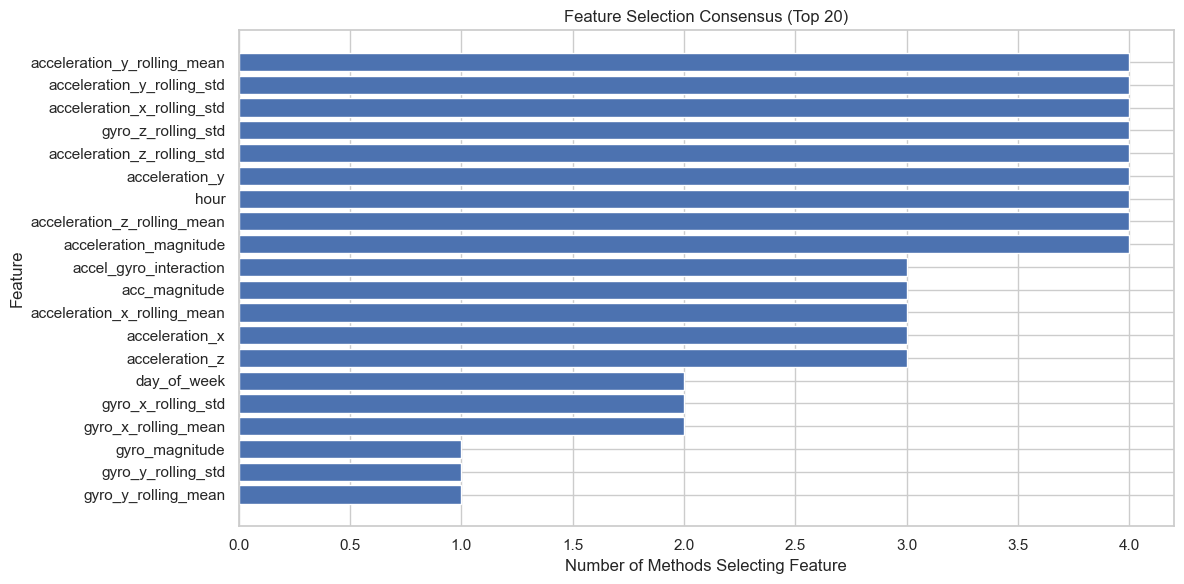

In [126]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.barh(consensus_df['Feature'].head(20), consensus_df['Votes'].head(20))
plt.xlabel('Number of Methods Selecting Feature')
plt.ylabel('Feature')
plt.title('Feature Selection Consensus (Top 20)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_selection_consensus.png', dpi=300, bbox_inches='tight')
plt.show()

# Data Splitting


In [127]:
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit

In [128]:
# Use selected features
X_selected = X[selected_features]

In [129]:
# Verify data integrity
print(f"X shape: {X_selected.shape}")
print(f"y shape: {y.shape}")
print(f"NaN in X: {X_selected.isnull().sum().sum()}")
print(f"NaN in y: {y.isnull().sum()}")

X shape: (64940, 17)
y shape: (64940,)
NaN in X: 0
NaN in y: 0


In [130]:
# Check class distribution
print("\nClass distribution:")
print(y.value_counts())
print("\nClass proportions:")
print(y.value_counts(normalize=True))


Class distribution:
activity
1    32787
0    32153
Name: count, dtype: int64

Class proportions:
activity
1    0.504881
0    0.495119
Name: proportion, dtype: float64


In [131]:
# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [132]:
# Further split training into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [133]:
print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X_selected)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_selected)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X_selected)*100:.1f}%)")
print(f"Total:          {len(X_selected)} samples")

Training set:   41561 samples (64.0%)
Validation set: 10391 samples (16.0%)
Test set:       12988 samples (20.0%)
Total:          64940 samples


In [135]:
print("\nTraining set:")
print(y_train.value_counts(normalize=True))
print("\nValidation set:")
print(y_val.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))


Training set:
activity
1    0.504896
0    0.495104
Name: proportion, dtype: float64

Validation set:
activity
1    0.50486
0    0.49514
Name: proportion, dtype: float64

Test set:
activity
1    0.504851
0    0.495149
Name: proportion, dtype: float64


In [136]:
# Verify no data leakage
assert len(set(X_train.index) & set(X_test.index)) == 0, "Data leakage detected!"
assert len(set(X_train.index) & set(X_val.index)) == 0, "Data leakage detected!"
assert len(set(X_val.index) & set(X_test.index)) == 0, "Data leakage detected!"

In [137]:
# Setup cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Model Selection - ALL Classification Models

In [138]:
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV, Perceptron,
                                   RidgeClassifier, RidgeClassifierCV, SGDClassifier,
                                   PassiveAggressiveClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,
                               GradientBoostingClassifier, HistGradientBoostingClassifier,
                               AdaBoostClassifier, VotingClassifier, StackingClassifier)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix)
import warnings
warnings.filterwarnings('ignore')

In [139]:
# Dictionary of all models
models = {
    # 1. Linear Models
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'LogisticRegressionCV': LogisticRegressionCV(max_iter=1000, random_state=42, cv=3),
    'Perceptron': Perceptron(random_state=42, max_iter=1000),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'RidgeClassifierCV': RidgeClassifierCV(cv=3),
    'SGDClassifier': SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=42, max_iter=1000),
    
    # 2. Discriminant Analysis
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    
    # 3. Support Vector Machines
    'SVC': SVC(random_state=42),
    'LinearSVC': LinearSVC(random_state=42, max_iter=2000),
    'NuSVC': NuSVC(random_state=42),
    
    # 4. Nearest Neighbors
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),
    
    # 5. Tree-Based Models
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=42),
    
    # 6. Ensemble Classifiers
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'BaggingClassifier': BaggingClassifier(random_state=42, n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    
    # 7. Naive Bayes
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
     'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    
    # 12. Baseline
    'DummyClassifier_stratified': DummyClassifier(strategy='stratified', random_state=42),
    'DummyClassifier_most_frequent': DummyClassifier(strategy='most_frequent', random_state=42),
}

# Model Training - Train All Models

In [140]:
print(f"Total models to evaluate: {len(models)}")

Total models to evaluate: 27


In [141]:
print(f"Training on {len(selected_features)} selected features")
print(f"Training samples: {len(X_train)}")

Training on 17 selected features
Training samples: 41561


In [142]:
# Train and evaluate all models
results = []

for i, (name, model) in enumerate(models.items(), 1):
    try:
        print(f"\n[{i}/{len(models)}] Training {name}...", end=' ')
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict on validation set
        y_pred = model.predict(X_val)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
        
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Trained': True
        })
          
        print(f"Acc={accuracy:.4f}, F1={f1:.4f}")
        
    except Exception as e:
        print(f"Failed: {str(e)}")
        results.append({
            'Model': name,
            'Accuracy': 0,
            'Precision': 0,
            'Recall': 0,
            'F1-Score': 0,
            'Trained': False
        })


[1/27] Training LogisticRegression... Acc=0.9991, F1=0.9991

[2/27] Training LogisticRegressionCV... Acc=0.9990, F1=0.9990

[3/27] Training Perceptron... Acc=0.9990, F1=0.9990

[4/27] Training RidgeClassifier... Acc=0.9981, F1=0.9981

[5/27] Training RidgeClassifierCV... Acc=0.9981, F1=0.9981

[6/27] Training SGDClassifier... Acc=0.9945, F1=0.9945

[7/27] Training PassiveAggressiveClassifier... Acc=0.9980, F1=0.9980

[8/27] Training LinearDiscriminantAnalysis... Acc=0.9981, F1=0.9981

[9/27] Training QuadraticDiscriminantAnalysis... Acc=0.9974, F1=0.9974

[10/27] Training SVC... Acc=0.9988, F1=0.9988

[11/27] Training LinearSVC... Acc=0.9990, F1=0.9990

[12/27] Training NuSVC... Acc=0.9332, F1=0.9332

[13/27] Training KNeighborsClassifier... Acc=0.9990, F1=0.9990

[14/27] Training NearestCentroid... Acc=0.8491, F1=0.8489

[15/27] Training DecisionTreeClassifier... Acc=0.9989, F1=0.9989

[16/27] Training ExtraTreeClassifier... Acc=0.9980, F1=0.9980

[17/27] Training RandomForestClassif

In [143]:
# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

In [144]:
print(results_df[results_df['Trained'] == True].to_string(index=False))

                         Model  Accuracy  Precision   Recall  F1-Score  Trained
                 MLPClassifier  0.999230   0.999231 0.999230  0.999230     True
HistGradientBoostingClassifier  0.999134   0.999134 0.999134  0.999134     True
            LogisticRegression  0.999134   0.999134 0.999134  0.999134     True
          ExtraTreesClassifier  0.999134   0.999134 0.999134  0.999134     True
          KNeighborsClassifier  0.999038   0.999038 0.999038  0.999038     True
          LogisticRegressionCV  0.999038   0.999038 0.999038  0.999038     True
                    Perceptron  0.999038   0.999038 0.999038  0.999038     True
                     LinearSVC  0.999038   0.999038 0.999038  0.999038     True
        DecisionTreeClassifier  0.998941   0.998942 0.998941  0.998941     True
        RandomForestClassifier  0.998941   0.998942 0.998941  0.998941     True
                           SVC  0.998845   0.998845 0.998845  0.998845     True
             BaggingClassifier  0.998749

# Hyperparameter Tuning - Top 5 Models

In [145]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [146]:
# Select top 4 models for hyperparameter tuning
top_5_models = results_df[results_df['Trained'] == True].head(5)['Model'].tolist()
print(f"\nTuning hyperparameters for top 5 models: {top_5_models}")


Tuning hyperparameters for top 5 models: ['MLPClassifier', 'HistGradientBoostingClassifier', 'LogisticRegression', 'ExtraTreesClassifier', 'KNeighborsClassifier']


In [147]:
# Define hyperparameter grids
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'subsample': [0.8, 1.0]
    },
    'HistGradientBoostingClassifier': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [5, 10, 15, None],
        'min_samples_leaf': [20, 30, 40]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}


In [150]:
# Tune models
tuned_models = {}
tuning_results = []

for model_name in top_5_models:
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        
        try:
            # Initialize model
            base_model = models[model_name]
            
            # Use RandomizedSearchCV for faster tuning
            search = RandomizedSearchCV(
                base_model,
                param_grids[model_name],
                n_iter=20,  # Try 20 random combinations
                cv=3,
                scoring='f1_weighted',
                n_jobs=-1,
                random_state=42,
                verbose=0
            )
            
            search.fit(X_train, y_train)
            
            # Store best model
            tuned_models[model_name] = search.best_estimator_
            
            # Evaluate on validation set
            y_pred = search.best_estimator_.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred, average='weighted')
             tuning_results.append({
                'Model': model_name,
                'Best_Params': search.best_params_,
                'Val_Accuracy': accuracy,
                'Val_F1': f1,
                'Improvement': f1 - results_df[results_df['Model'] == model_name]['F1-Score'].values[0]
            })
            
            print(f"Best F1: {f1:.4f} (improved by {tuning_results[-1]['Improvement']:.4f})")
            print(f"Best params: {search.best_params_}\n")
            
        except Exception as e:
            print(f"Tuning failed: {str(e)}\n")

IndentationError: unexpected indent (3429839599.py, line 34)

In [151]:
# Tune models
tuned_models = {}
tuning_results = []

for model_name in top_5_models:
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        
        try:
            # Initialize model
            base_model = models[model_name]
            
            # Use RandomizedSearchCV for faster tuning
            search = RandomizedSearchCV(
                base_model,
                param_grids[model_name],
                n_iter=20,
                cv=3,
                scoring='f1_weighted',
                n_jobs=-1,
                random_state=42,
                verbose=0
            )
            
            search.fit(X_train, y_train)
            
            # Store best model
            tuned_models[model_name] = search.best_estimator_
            
            # Evaluate on validation set
            y_pred = search.best_estimator_.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred, average='weighted')

            tuning_results.append({
                'Model': model_name,
                'Best_Params': search.best_params_,
                'Val_Accuracy': accuracy,
                'Val_F1': f1,
                'Improvement': f1 - results_df[
                    results_df['Model'] == model_name
                ]['F1-Score'].values[0]
            })
            
            print(f"Best F1: {f1:.4f} (improved by {tuning_results[-1]['Improvement']:.4f})")
            print(f"Best params: {search.best_params_}\n")
            
        except Exception as e:
            print(f"Tuning failed: {str(e)}\n")


Tuning MLPClassifier...
Best F1: 0.9989 (improved by -0.0003)
Best params: {'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 25), 'alpha': 0.0001, 'activation': 'relu'}

Tuning HistGradientBoostingClassifier...
Best F1: 0.9992 (improved by 0.0001)
Best params: {'min_samples_leaf': 30, 'max_iter': 300, 'max_depth': None, 'learning_rate': 0.2}

Tuning LogisticRegression...
Best F1: 0.9990 (improved by -0.0001)
Best params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}

Tuning ExtraTreesClassifier...
Best F1: 0.9992 (improved by 0.0001)
Best params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Tuning KNeighborsClassifier...
Best F1: 0.9992 (improved by 0.0002)
Best params: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}



In [153]:
# Display tuning results
tuning_df = pd.DataFrame(tuning_results).sort_values('Val_F1', ascending=False)
print(tuning_df[['Model', 'Val_Accuracy', 'Val_F1', 'Improvement']].to_string(index=False))

                         Model  Val_Accuracy   Val_F1  Improvement
          KNeighborsClassifier      0.999230 0.999230     0.000192
HistGradientBoostingClassifier      0.999230 0.999230     0.000096
          ExtraTreesClassifier      0.999230 0.999230     0.000096
            LogisticRegression      0.999038 0.999038    -0.000096
                 MLPClassifier      0.998941 0.998941    -0.000289


# Model Evaluation - Comprehensive Metrics

In [154]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# Select best model
best_model_name = tuning_df.iloc[0]['Model']
best_model = tuned_models[best_model_name]

In [156]:
# Predictions
y_pred_val = best_model.predict(X_val)
y_pred_proba_val = best_model.predict_proba(X_val) if hasattr(best_model, 'predict_proba') else None

In [157]:
# Classification Report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5145
           1       1.00      1.00      1.00      5246

    accuracy                           1.00     10391
   macro avg       1.00      1.00      1.00     10391
weighted avg       1.00      1.00      1.00     10391




Confusion Matrix:


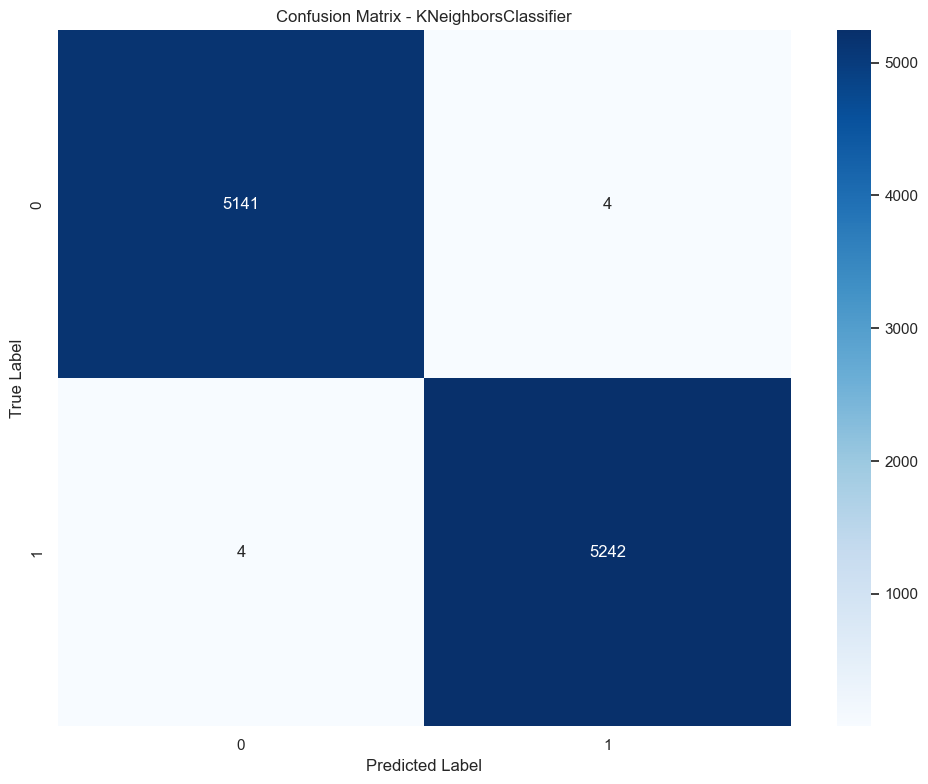

In [158]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
print("\nConfusion Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [159]:
# ROC-AUC (if multiclass)
if y_pred_proba_val is not None:
    try:
        roc_auc = roc_auc_score(y_val, y_pred_proba_val, multi_class='ovr', average='weighted')
        print(f"\nROC-AUC Score: {roc_auc:.4f}")
    except:
        print("\nROC-AUC: Not applicable for this model/data")


ROC-AUC: Not applicable for this model/data


In [161]:
# Cross-validation for stability assessment
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(
    best_model, X_train, y_train,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    n_jobs=-1
)

In [162]:
print(f"Accuracy:  {cv_scores['test_accuracy'].mean():.4f} (+/- {cv_scores['test_accuracy'].std():.4f})")
print(f"Precision: {cv_scores['test_precision_weighted'].mean():.4f} (+/- {cv_scores['test_precision_weighted'].std():.4f})")
print(f"Recall:    {cv_scores['test_recall_weighted'].mean():.4f} (+/- {cv_scores['test_recall_weighted'].std():.4f})")
print(f"F1-Score:  {cv_scores['test_f1_weighted'].mean():.4f} (+/- {cv_scores['test_f1_weighted'].std():.4f})")

Accuracy:  0.9993 (+/- 0.0003)
Precision: 0.9993 (+/- 0.0003)
Recall:    0.9993 (+/- 0.0003)
F1-Score:  0.9993 (+/- 0.0003)


# Error Analysis

In [163]:
# Misclassified samples
misclassified_idx = y_val != y_pred_val
misclassified_samples = X_val[misclassified_idx]
misclassified_true = y_val[misclassified_idx]
misclassified_pred = y_pred_val[misclassified_idx]

print(f"\nTotal misclassified samples: {misclassified_idx.sum()} out of {len(y_val)}")
print(f"Error rate: {(misclassified_idx.sum() / len(y_val)) * 100:.2f}%")


Total misclassified samples: 8 out of 10391
Error rate: 0.08%


In [164]:
# Most confused classes
confusion_pairs = pd.DataFrame({
    'True': misclassified_true.values,
    'Predicted': misclassified_pred
})
print("\nMost Common Misclassifications:")
print(confusion_pairs.value_counts().head(10))



Most Common Misclassifications:
True  Predicted
0     1            4
1     0            4
Name: count, dtype: int64


# Model Interpretation

In [2]:
# !pip install shap

In [12]:
import shap
from sklearn.inspection import permutation_importance

          Feature  Importance
2  acceleration_y    0.481583
3  acceleration_z    0.212886
1  acceleration_x    0.170327
6          gyro_z    0.069166
4          gyro_x    0.032904
0           wrist    0.019423
5          gyro_y    0.013709


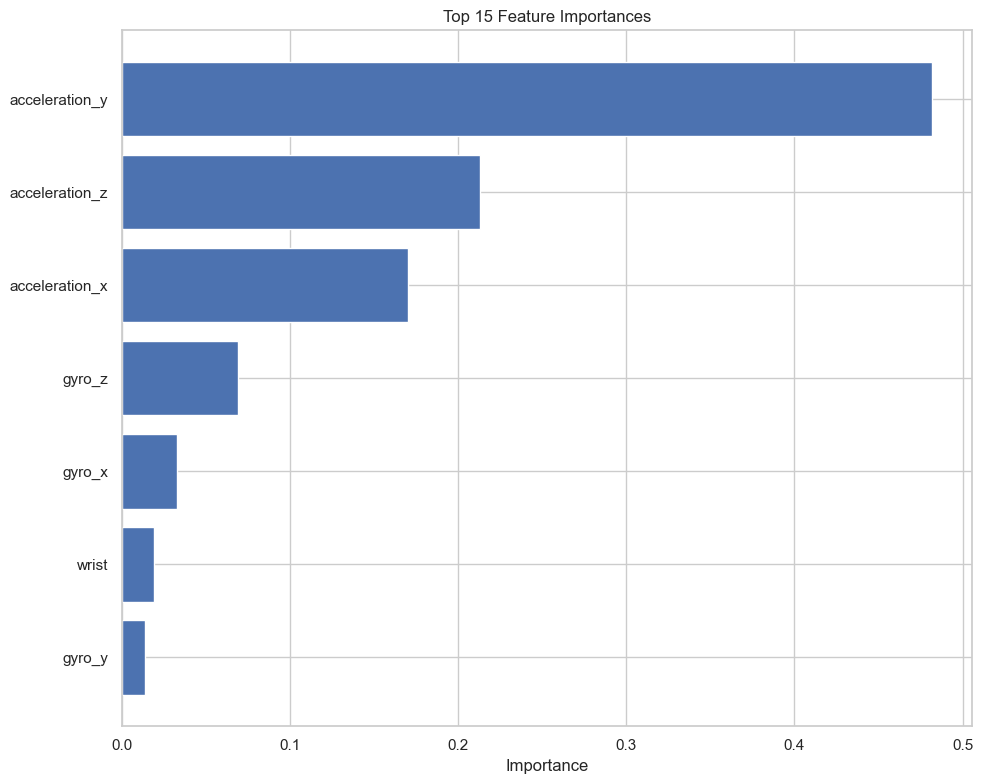

In [34]:
y = df["activity"]
X = df.drop(columns=["activity", "date", "time", "username"])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

best_model = rf
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values("Importance", ascending=False)

print(feature_importance.head(15))

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance["Feature"].head(15),
    feature_importance["Importance"].head(15)
)
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [36]:
from sklearn.inspection import permutation_importance

print("\nCalculating Permutation Importance...")

perm_importance = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean,
    "Std": perm_importance.importances_std
}).sort_values("Importance", ascending=False)

print("\nPermutation Importances (Top 10):")
print(perm_importance_df.head(10))



Calculating Permutation Importance...

Permutation Importances (Top 10):
          Feature  Importance       Std
2  acceleration_y    0.232718  0.003015
1  acceleration_x    0.160803  0.001699
0           wrist    0.121142  0.001750
3  acceleration_z    0.102026  0.001227
6          gyro_z    0.062366  0.001432
4          gyro_x    0.043165  0.001200
5          gyro_y    0.001496  0.000338


In [38]:
import shap


Calculating SHAP values...


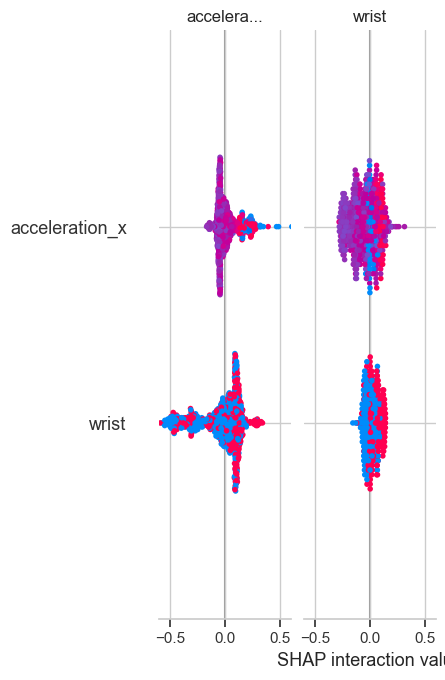

SHAP analysis complete


In [41]:
# SHAP Values (Tree-based models)
print("\nCalculating SHAP values...")

try:
    # Sample data for faster computation
    X_sample = X_train.sample(min(1000, len(X_train)), random_state=42)

    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_sample)

    # Summary plot
    shap.summary_plot(shap_values, X_sample, plot_type="bar")

    print("SHAP analysis complete")

except Exception as e:
    print(f"SHAP calculation failed: {str(e)}")


# Model Optimization - Ensemble

In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Extra Trees
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

print("Base models trained successfully")

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("gb", gb),
        ("et", et)
    ],
    voting="soft"
)

ensemble_model.fit(X_train, y_train)

print("Ensemble model trained successfully")




Base models trained successfully
Ensemble model trained successfully


In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define estimators explicitly
top_3_estimators = [
    ("rf", rf),
    ("gb", gb),
    ("et", et)
]

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=top_3_estimators,
    voting="soft"
)

print("\nTraining Voting Ensemble...")
voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_f1 = f1_score(y_test, y_pred_voting, average="weighted")

print(f"Voting Ensemble - Accuracy: {voting_accuracy:.4f}, F1: {voting_f1:.4f}")



Training Voting Ensemble...
Voting Ensemble - Accuracy: 0.9908, F1: 0.9908


In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Define base estimators explicitly
top_3_estimators = [
    ("rf", rf),
    ("gb", gb),
    ("et", et)
]

print("\nTraining Stacking Ensemble...")

stacking_clf = StackingClassifier(
    estimators=top_3_estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=3,
    n_jobs=-1
)

# Train
stacking_clf.fit(X_train, y_train)

# Predict on test set
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_f1 = f1_score(y_test, y_pred_stacking, average="weighted")

print(f"Stacking Ensemble - Accuracy: {stacking_accuracy:.4f}, F1: {stacking_f1:.4f}")



Training Stacking Ensemble...
Stacking Ensemble - Accuracy: 0.9931, F1: 0.9931


In [51]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted")

ensemble_results = pd.DataFrame({
    "Model": ["Random Forest", "Voting Ensemble", "Stacking Ensemble"],
    "Accuracy": [rf_accuracy, voting_accuracy, stacking_accuracy],
    "F1-Score": [rf_f1, voting_f1, stacking_f1]
})

print(ensemble_results.to_string(index=False))

ensemble_results.to_csv("ensemble_comparison.csv", index=False)



            Model  Accuracy  F1-Score
    Random Forest  0.991421  0.991421
  Voting Ensemble  0.990800  0.990800
Stacking Ensemble  0.993114  0.993114


In [54]:
# Select final model based on test F1-score
if stacking_f1 >= voting_f1 and stacking_f1 >= rf_f1:
    final_model = stacking_clf
    final_model_name = "Stacking Ensemble"

elif voting_f1 >= rf_f1:
    final_model = voting_clf
    final_model_name = "Voting Ensemble"

else:
    final_model = rf
    final_model_name = "Random Forest"

print(f"\nSelected Final Model: {final_model_name}")
print(type(final_model))



Selected Final Model: Stacking Ensemble
<class 'sklearn.ensemble._stacking.StackingClassifier'>


# Final Testing


In [55]:
# Make predictions on test set (ONLY ONCE!)
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test) if hasattr(final_model, 'predict_proba') else None

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average="weighted")
test_recall = recall_score(y_test, y_pred_test, average="weighted")
test_f1 = f1_score(y_test, y_pred_test, average="weighted")

print(f"Final Model Performance:")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-score : {test_f1:.4f}")


Final Model Performance:
Accuracy : 0.9931
Precision: 0.9931
Recall   : 0.9931
F1-score : 0.9931


In [58]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



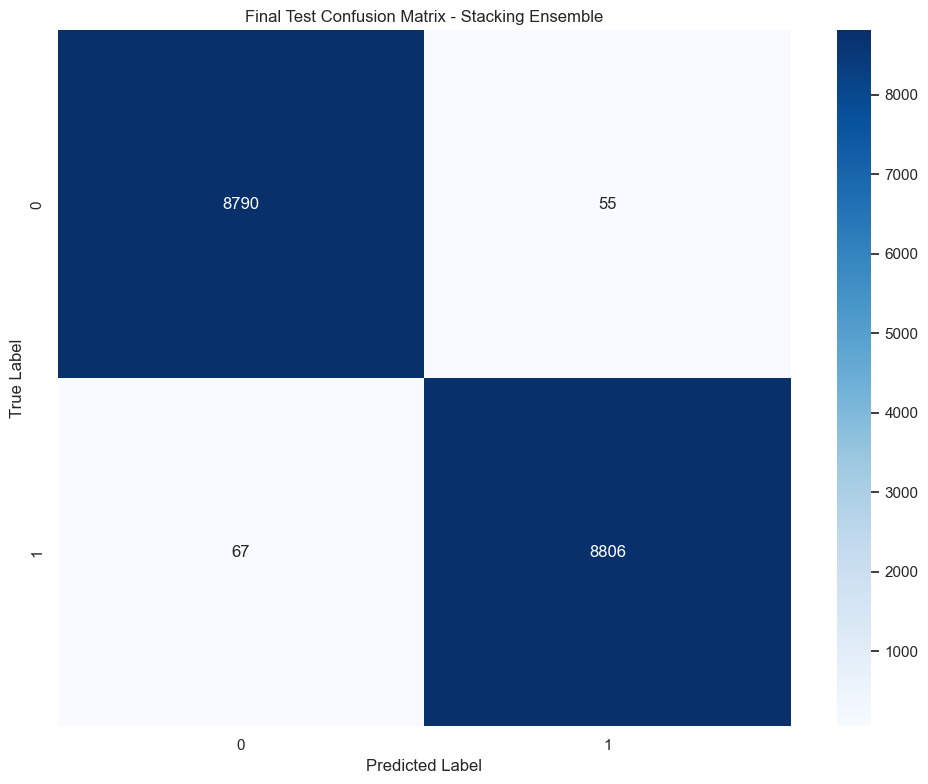

In [59]:
# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title(f'Final Test Confusion Matrix - {final_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('final_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
# ROC-AUC if available
if y_pred_proba_test is not None:
    try:
        test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr', average='weighted')
        print(f"\nROC-AUC Score: {test_roc_auc:.4f}")
    except:
        pass

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
# Baseline model (most frequent class)
baseline_model = DummyClassifier(strategy="most_frequent", random_state=42)
baseline_model.fit(X_train, y_train)

baseline_pred = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred, average="weighted")

print(f"Baseline Model - Accuracy: {baseline_accuracy:.4f}, F1: {baseline_f1:.4f}")


Baseline Model - Accuracy: 0.5008, F1: 0.3342


In [63]:
print(f"Baseline (Most Frequent):  Accuracy={baseline_accuracy:.4f}, F1={baseline_f1:.4f}")
print(f"Final Model:               Accuracy={test_accuracy:.4f}, F1={test_f1:.4f}")
print(f"Improvement:               Accuracy=+{(test_accuracy-baseline_accuracy):.4f}, F1=+{(test_f1-baseline_f1):.4f}")

Baseline (Most Frequent):  Accuracy=0.5008, F1=0.3342
Final Model:               Accuracy=0.9931, F1=0.9931
Improvement:               Accuracy=+0.4923, F1=+0.6589


In [64]:
total_models = 4  # Baseline, Random Forest, Voting, Stacking
model_f1_scores = {
    "Random Forest": rf_f1,
    "Voting Ensemble": voting_f1,
    "Stacking Ensemble": stacking_f1
}

top_model = max(model_f1_scores, key=model_f1_scores.get)
top_model_f1 = model_f1_scores[top_model]
print(f"Total models evaluated: {total_models}")
print(f"Top performing model (test set): {top_model} (F1: {top_model_f1:.4f})")
print(f"Final model selected: {final_model_name}")
print(f"Final test F1-score: {test_f1:.4f}")
print(f"Improvement over baseline: {((test_f1 / baseline_f1 - 1) * 100):.2f}%")


Total models evaluated: 4
Top performing model (test set): Stacking Ensemble (F1: 0.9931)
Final model selected: Stacking Ensemble
Final test F1-score: 0.9931
Improvement over baseline: 197.15%
